# Exploratory Data Analysis (Preprocessed weekly Dengue cases and Weather Data)

>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ***~ Ashutosh Kumar***

In [1]:
#Importing Python Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# For ignoring Warnings while running Python codes.

import warnings
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)
warnings.filterwarnings('ignore',category = FutureWarning)

## Loading the preprocessed Data

In [3]:
df = pd.read_csv('/content/Sri_lanka_dengue_cases_weather_weekly_2007_2024.csv')

It is the final csv file provided by the Data Processing Team, the name looks different because I renamed it.. :)

In [4]:
df.head()

District  Number_of_Cases Week_Start_Date  Month  Year  Week Week_End_Date  \
0   Ampara                0      2007-01-01      1  2007     1    2007-01-08   
1   Ampara                0      2007-01-08      1  2007     2    2007-01-15   
2   Ampara                0      2007-01-15      1  2007     3    2007-01-22   
3   Ampara                0      2007-01-22      1  2007     4    2007-01-29   
4   Ampara                0      2007-01-29      1  2007     5    2007-02-05   

   Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Apparent Max Temp (°C)  \
0            26.9375            21.8625                     28.8500   
1            26.3500            23.3250                     30.2625   
2            27.2125            23.1625                     29.5750   
3            26.7250            23.0375                     29.9500   
4            27.3625            22.9625                     30.7500   

   Avg Apparent Min Temp (°C)  Total Precipitation (mm)  Total Rain (mm)  \
0                     24.1000                       8.0              8.0   
1                     26.7000                      86.1             86.1   
2                     25.9625                       3.1              3.1   
3                     26.1125                      53.6             53.6   
4                     26.1250                       8.2              8.2   

   Avg Wind Speed (km/h)  Max Wind Gusts (km/h)  Weather Code  \
0                18.2000                   44.3             3   
1                17.0250                   43.6            53   
2                20.1875                   48.2            51   
3                17.2000                   42.5            61   
4                17.2625                   40.0            51   

   Avg Daylight Duration (hours)  Avg Sunrise Time  Avg Sunset Time  
0                      11.714583               376             1079  
1                      11.733333               378             1082  
2                      11.754167               380             1085  
3                      11.783333               381             1088  
4                      11.812500               382             1090

In [5]:
df.shape

(22950, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District                       22950 non-null  object 
 1   Number_of_Cases                22950 non-null  int64  
 2   Week_Start_Date                22950 non-null  object 
 3   Month                          22950 non-null  int64  
 4   Year                           22950 non-null  int64  
 5   Week                           22950 non-null  int64  
 6   Week_End_Date                  22950 non-null  object 
 7   Avg Max Temp (°C)              22950 non-null  float64
 8   Avg Min Temp (°C)              22950 non-null  float64
 9   Avg Apparent Max Temp (°C)     22950 non-null  float64
 10  Avg Apparent Min Temp (°C)     22950 non-null  float64
 11  Total Precipitation (mm)       22950 non-null  float64
 12  Total Rain (mm)                22950 non-null 

In [7]:
#Checking for NULL Values

df.isnull().sum()

District                         0
Number_of_Cases                  0
Week_Start_Date                  0
Month                            0
Year                             0
Week                             0
Week_End_Date                    0
Avg Max Temp (°C)                0
Avg Min Temp (°C)                0
Avg Apparent Max Temp (°C)       0
Avg Apparent Min Temp (°C)       0
Total Precipitation (mm)         0
Total Rain (mm)                  0
Avg Wind Speed (km/h)            0
Max Wind Gusts (km/h)            0
Weather Code                     0
Avg Daylight Duration (hours)    0
Avg Sunrise Time                 0
Avg Sunset Time                  0
dtype: int64

# Exploratory Data Analysis

In [8]:
df.describe().T

count         mean        std          min  \
Number_of_Cases                22950.0    34.749150  87.465172     0.000000   
Month                          22950.0     6.438998   3.443373     1.000000   
Year                           22950.0  2015.293028   5.080958  2007.000000   
Week                           22950.0    26.228758  15.032246     1.000000   
Avg Max Temp (°C)              22950.0    29.606447   3.030273    15.600000   
Avg Min Temp (°C)              22950.0    23.524391   2.765594     7.212500   
Avg Apparent Max Temp (°C)     22950.0    33.945840   3.734016    13.487500   
Avg Apparent Min Temp (°C)     22950.0    26.904558   3.589638     4.712500   
Total Precipitation (mm)       22950.0    42.048227  49.619659     0.000000   
Total Rain (mm)                22950.0    42.048227  49.619659     0.000000   
Avg Wind Speed (km/h)          22950.0    16.888853   6.176939     3.587500   
Max Wind Gusts (km/h)          22950.0    45.612248  12.053351    20.900000   
Weather Code                   22950.0    43.295207  23.264783     0.000000   
Avg Daylight Duration (hours)  22950.0    12.126708   0.308043    11.558333   
Avg Sunrise Time               22950.0   363.108976  12.000604   344.000000   
Avg Sunset Time                22950.0  1090.726492  13.643070  1061.000000   

                                     25%          50%         75%        max  
Number_of_Cases                   2.0000     9.000000    31.00000  2631.0000  
Month                             3.0000     6.000000     9.00000    12.0000  
Year                           2011.0000  2015.000000  2020.00000  2024.0000  
Week                             13.0000    26.000000    39.00000    53.0000  
Avg Max Temp (°C)                28.1500    29.425000    31.41250    38.6125  
Avg Min Temp (°C)                22.4500    24.025000    25.28750    29.2625  
Avg Apparent Max Temp (°C)       32.3000    34.137500    36.28750    44.3375  
Avg Apparent Min Temp (°C)       25.7125    27.787500    29.07500    33.8500  
Total Precipitation (mm)          7.4000    24.900000    59.80000   599.0000  
Total Rain (mm)                   7.4000    24.900000    59.80000   599.0000  
Avg Wind Speed (km/h)            12.3250    16.012500    20.40000    42.0875  
Max Wind Gusts (km/h)            36.4000    43.600000    52.90000   114.1000  
Weather Code                     51.0000    51.000000    61.00000    65.0000  
Avg Daylight Duration (hours)    11.8375    12.129167    12.41875    12.6875  
Avg Sunrise Time                354.0000   359.000000   372.00000   391.0000  
Avg Sunset Time                1080.0000  1095.000000  1100.00000  1114.0000

***I feel it is important to analyze features like temperature, rainfall, and windspeed beyond their direct relationship with the number of dengue cases for the following reasons:***

### 1. **Environmental Factors and Disease Transmission**:
   - **Temperature**, **rainfall**, and **windspeed** are known to influence mosquito behavior and the lifecycle of the *Aedes* mosquito, the primary vector for dengue transmission.
   - **Temperature** impacts mosquito breeding rates, biting behavior, and the incubation period of the virus within mosquitoes. Higher temperatures can accelerate these processes, leading to increased transmission rates.
   - **Rainfall** directly influences mosquito breeding habitats by creating standing water where mosquitoes lay their eggs. Even though rainfall and the number of dengue cases may not have a very strong direct correlation, periods of heavy rainfall often precede outbreaks as mosquito populations grow.
   - **Windspeed** can also impact mosquito dispersal. Low wind speeds may allow mosquitoes to travel more easily, spreading the virus further.

### 2. **Lag Effects**:
   - The impact of environmental factors on dengue outbreaks may not be immediate. It often takes time for weather conditions (e.g., heavy rainfall) to lead to a significant increase in mosquito populations, which is then followed by a rise in cases. Understanding the trends in environmental data may help in identifying **lagged effects** that contribute to outbreaks.
   
### 3. **Feature Engineering for Predictive Modeling**:
   - Even if individual environmental factors show weak direct correlations with the number of cases, their **combined or lagged effects** might be critical for predictive modeling. For example, dengue outbreaks might be more strongly predicted by **specific combinations** of temperature and rainfall rather than individual features.
   - Studying trends and patterns in these variables helps in **engineering new features** such as "high rainfall periods followed by warmer temperatures" which may lead to more accurate predictive models.

### 4. **Seasonality and Temporal Patterns**:
   - Environmental factors such as temperature and rainfall are **seasonal** in nature, and they often show clear **temporal patterns**. These seasonal trends may align with or precede dengue outbreaks. For example, dengue cases may peak a few weeks after periods of heavy rain, suggesting that these features can be used as **early indicators**.

### 5. **Generalizability**:
   - If we understand the environmental conditions under which dengue outbreaks are likely to occur, the predictive model becomes more **generalizable** to other regions or time periods. For instance, a model that factors in seasonal rainfall and temperature can be applied to predict dengue risk in different areas where similar conditions arise.

### Conclusion:
While the direct correlation between environmental variables and dengue cases might be weak, their indirect effects and combined interactions play a crucial role in **mosquito behavior and virus transmission dynamics**. Therefore, it is essential to analyze these variables thoroughly to capture the full picture and develop a **robust predictive model** for dengue outbreaks.

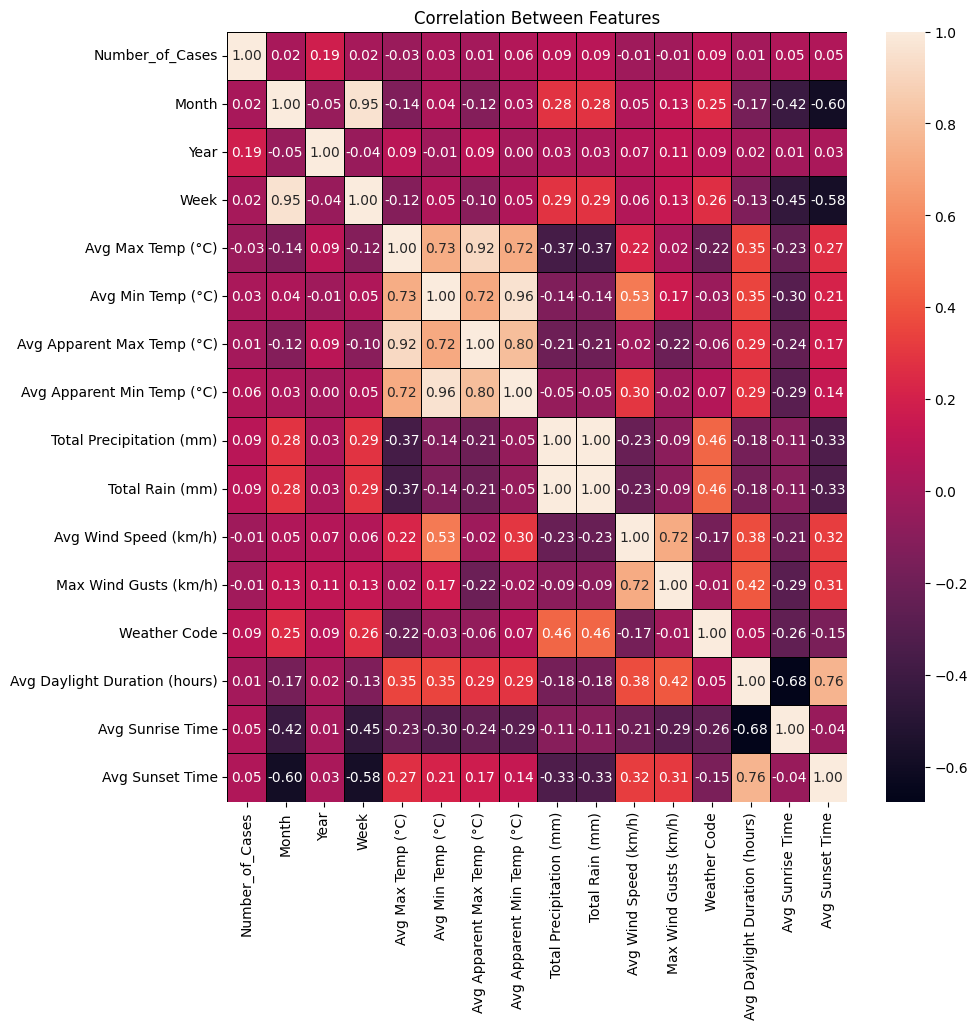

In [9]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(numeric_only=True), linewidths = 0.5,annot = True, fmt = ".2f", linecolor = "black", ax = ax)
plt.title("Correlation Between Features")
plt.show();

#### Temperature Variables:
- Strong positive correlations (0.72-0.96) between various temperature measures (Avg Max Temp, Avg Min Temp, Avg Apparent Max Temp, Avg Apparent Min Temp).
- This suggests **redundancy in temperature data**; we might be able to **use fewer temperature variables** in our model.

#### Precipitation:
- **Total Precipitation and Total Rain** are perfectly correlated (1.00), indicating they're **likely the same** measure.
- Moderate positive correlation (0.46) with Weather Code, suggesting certain weather conditions are associated with more rainfall.

#### Wind Speed:
- Strong correlation (0.72) between Avg Wind Speed and Max Wind Gusts.
- Moderate positive correlation with Avg Min Temp (0.53).

#### Daylight and Time:
- Strong negative correlation (-0.68) between Avg Daylight Duration and Avg Sunrise Time.
- Very strong positive correlation (0.76) between Avg Daylight Duration and Avg Sunset Time.
- These relationships are expected due to the nature of daylight patterns.

#### Number of Cases (Dengue):
- **Weak correlations with most variables.**
- **Strongest (but still weak) positive correlation with Year (0.19), suggesting a possible slight increasing trend over time.**
- **Weak positive correlations with Total Precipitation/Rain (0.09) and Weather Code (0.09).**

#### Temporal Variables:
- Strong correlations between Month, Week, and various environmental factors, indicating **clear seasonal patterns**.

#### Weather Code:
- Moderate positive correlations with precipitation (0.46) and weak to moderate correlations with several other variables.

#### **Summary:-**
- **Temperature variables are highly intercorrelated and could be simplified.**
- **Precipitation seems to be an important factor, correlating with several other variables.**
- **The weak correlations with Number of Cases suggest that predicting dengue outbreaks may require more complex models or additional variables not present in this dataset.**
- Strong seasonal patterns are evident in the data.

## **Understanding Data Distribution**
- Histograms and Density Plots: Generating histograms and kernel density estimates (KDE) for continuous variables like temperature, precipitation, wind speed, etc., to understand their distributions.

- Boxplots: Using boxplots to identify outliers and understand the spread of data across different months or years.

In [10]:
df.columns

Index(['District', 'Number_of_Cases', 'Week_Start_Date', 'Month', 'Year',
       'Week', 'Week_End_Date', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)',
       'Avg Apparent Max Temp (°C)', 'Avg Apparent Min Temp (°C)',
       'Total Precipitation (mm)', 'Total Rain (mm)', 'Avg Wind Speed (km/h)',
       'Max Wind Gusts (km/h)', 'Weather Code',
       'Avg Daylight Duration (hours)', 'Avg Sunrise Time', 'Avg Sunset Time'],
      dtype='object')

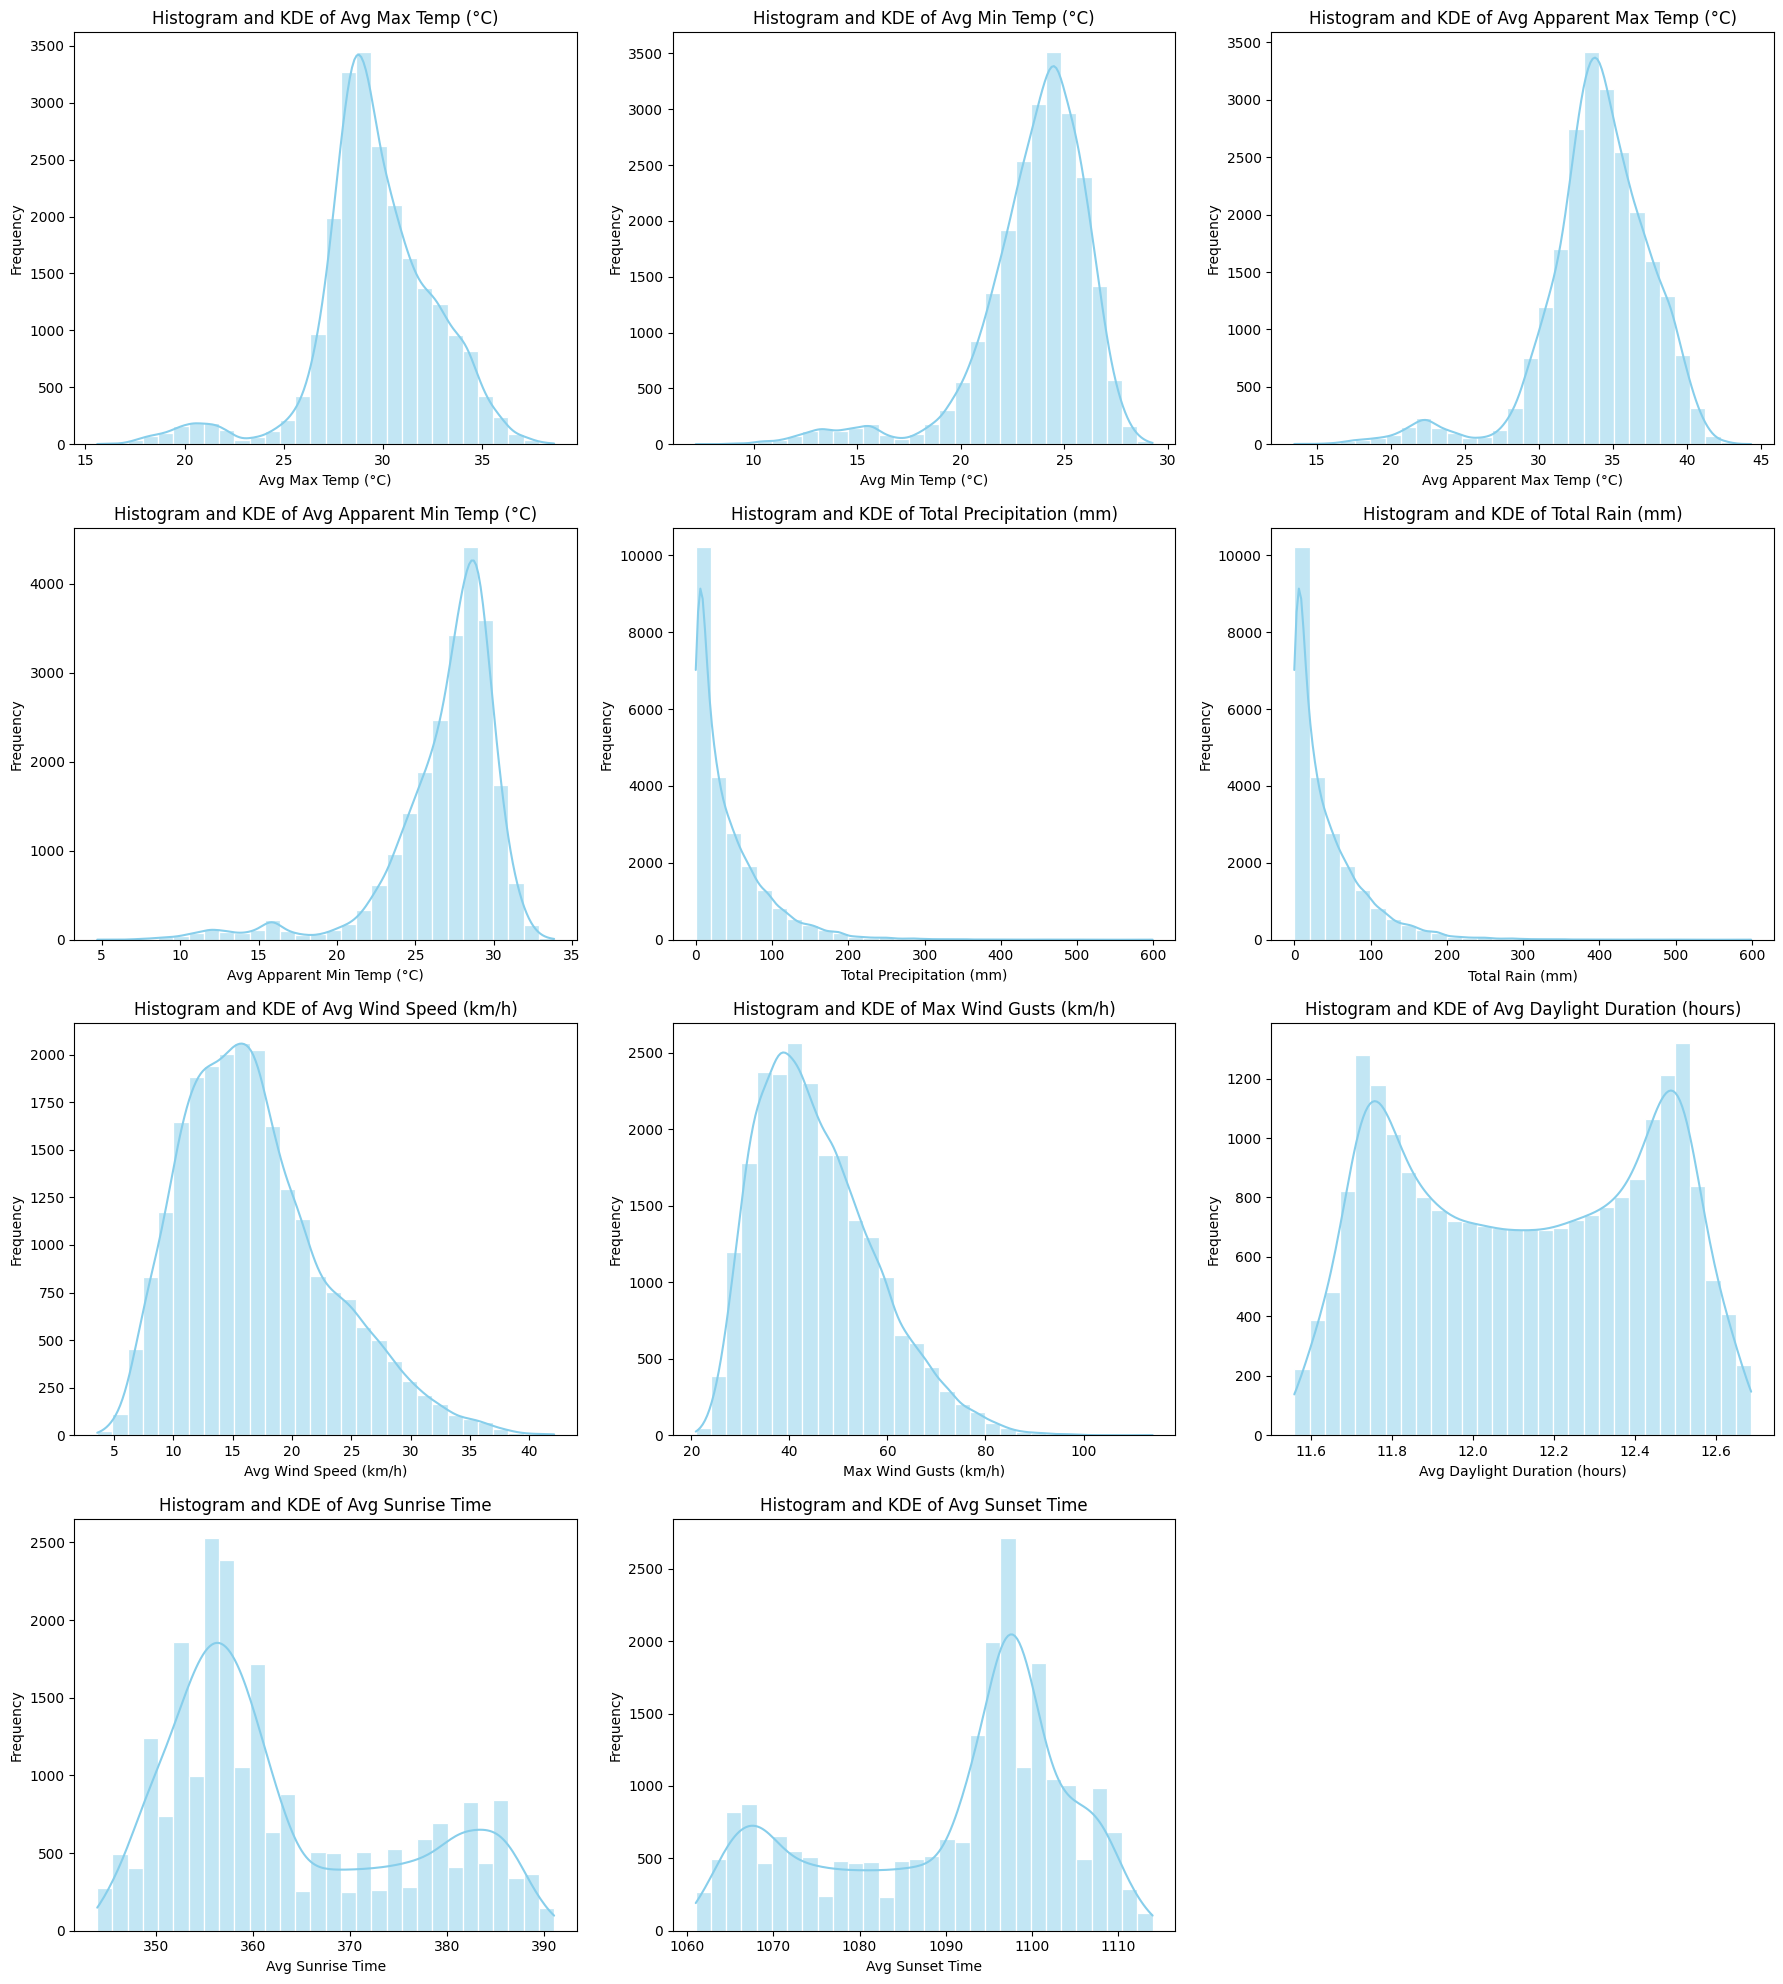

In [11]:
continuous_vars = ['Avg Max Temp (°C)', 'Avg Min Temp (°C)', 'Avg Apparent Max Temp (°C)',
                   'Avg Apparent Min Temp (°C)', 'Total Precipitation (mm)', 'Total Rain (mm)',
                   'Avg Wind Speed (km/h)', 'Max Wind Gusts (km/h)',
                   'Avg Daylight Duration (hours)', 'Avg Sunrise Time', 'Avg Sunset Time']

num_vars = len(continuous_vars)

# Calculate the number of rows and columns for the subplots
cols = 3
rows = num_vars // cols + (num_vars % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()  # Flatten the array for easy iteration

sns.set(style="whitegrid")

# Plot histograms and KDE plots
for i, var in enumerate(continuous_vars):
    sns.histplot(df[var], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram and KDE of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show();

#### Temperature Variables

- **Avg Max Temp (°C), Avg Min Temp (°C), Avg Apparent Max Temp (°C), Avg Apparent Min Temp (°C)**: These variables show a clear distribution with a peak around the 25-30°C range, which is typical for tropical climates.

#### Precipitation Variables

- **Total Precipitation (mm), Total Rain (mm)**: Both precipitation-related variables are heavily skewed to the right, with most of the data concentrated at lower values. This suggests that most weeks experience low to moderate rainfall, with occasional heavy rainfall events.

#### Wind Speed Variables

- **Avg Wind Speed (km/h), Max Wind Gusts (km/h)**: The wind speed variables also show a right-skewed distribution, with most of the data concentrated at lower wind speeds and fewer occurrences of high wind speeds.

#### Daylight Duration and Time Variables

- **Avg Daylight Duration (hours), Avg Sunrise Time, Avg Sunset Time**:
  - The **Avg Daylight Duration** has a relatively narrow range, indicating consistent daylight hours throughout the year.
  - The **Avg Sunrise Time** and **Avg Sunset Time** show distinct peaks, which might correspond to seasonal variations.


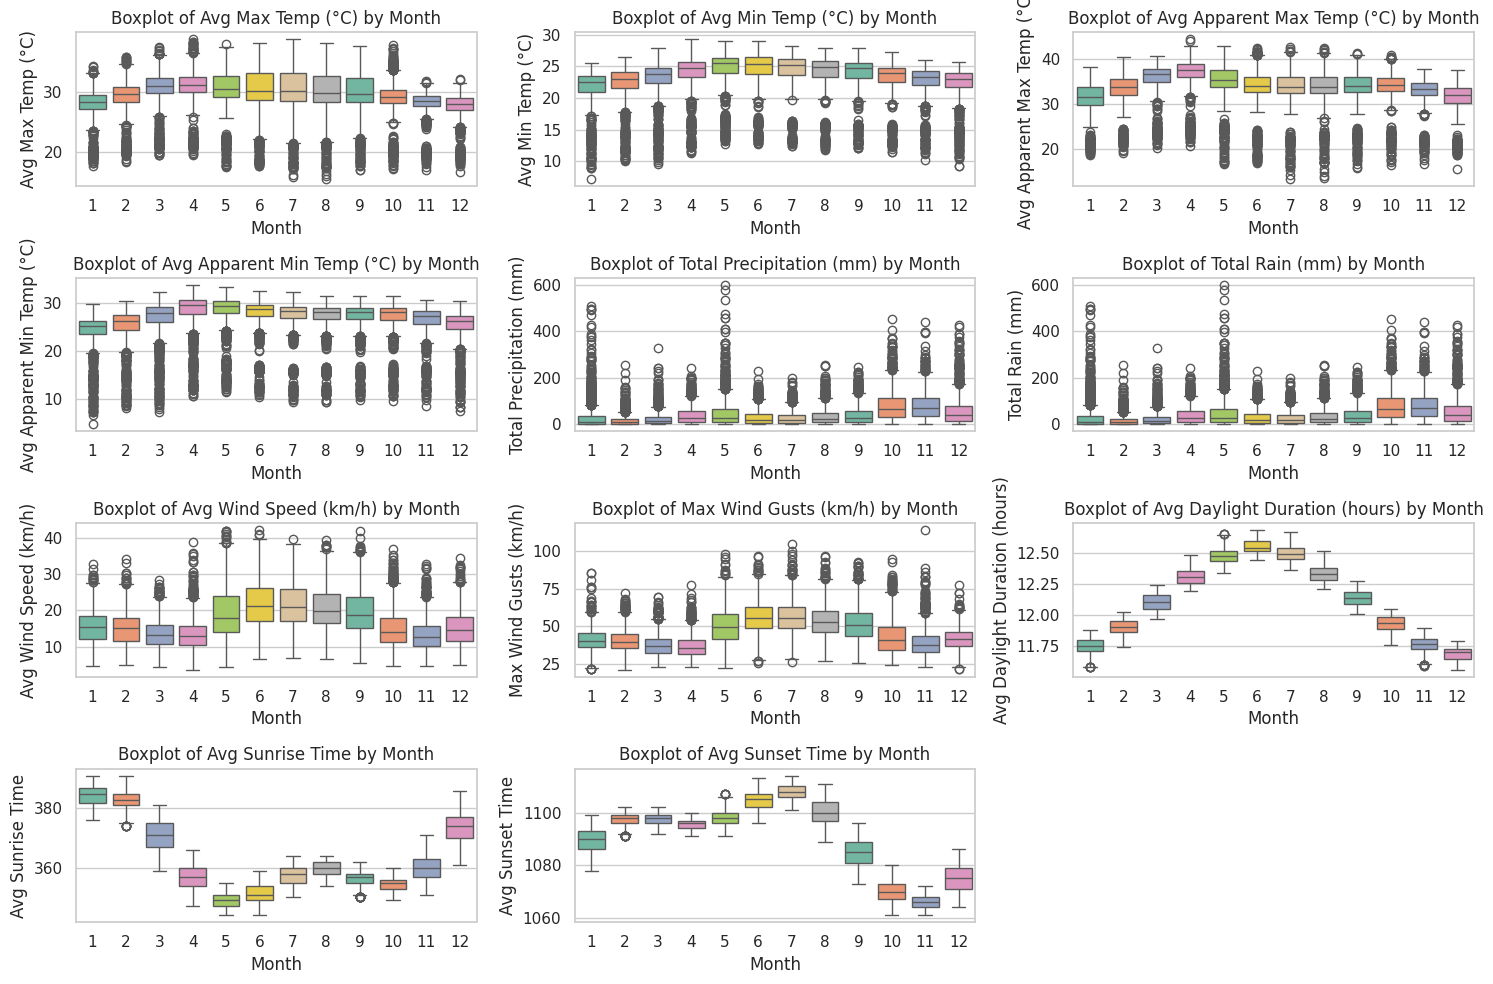

In [12]:
sns.set(style="whitegrid")

continuous_vars = ['Avg Max Temp (°C)', 'Avg Min Temp (°C)', 'Avg Apparent Max Temp (°C)', 'Avg Apparent Min Temp (°C)',
                   'Total Precipitation (mm)', 'Total Rain (mm)', 'Avg Wind Speed (km/h)', 'Max Wind Gusts (km/h)',
                   'Avg Daylight Duration (hours)', 'Avg Sunrise Time', 'Avg Sunset Time']

# Boxplot for each variable across months
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x='Month', y=var, palette='Set2')
    plt.title(f'Boxplot of {var} by Month')
    plt.xlabel('Month')
    plt.ylabel(var)
plt.tight_layout()
plt.show();

### Insights from Boxplots

1. **Temperature Variability by Month**:
   - **Avg Max Temp (°C), Avg Min Temp (°C)**: Temperatures are relatively stable across the months, with slight dips in the initial and final months of the year (likely during cooler months).
   - **Apparent Temperatures**: Similar patterns are observed for apparent temperatures, with higher variability during the first and last quarters of the year.

2. **Precipitation**:
   - **Total Precipitation (mm) & Total Rain (mm)**: There is significant variability in precipitation across months, with some months experiencing much higher rainfall than others. Months 1,5,10,11,12 show more frequent outliers, indicating occasional heavy rainfall events.

3. **Wind Speed**:
   - **Avg Wind Speed (km/h)**: Wind speeds are generally consistent across the year, with some months showing higher median values (e.g., month 6).
   - **Max Wind Gusts (km/h)**: The maximum wind gusts also display a similar pattern, with noticeable outliers indicating extreme wind events.

4. **Daylight Duration**:
   - **Avg Daylight Duration (hours)**: Daylight hours increase steadily from the beginning of the year, peaking around mid-year (likely summer) and then declining towards the end of the year.
   - **Sunrise and Sunset Times**: The sunrise time is earliest in the middle of the year, while sunset time shows a clear trend of later sunsets in the middle of the year, corresponding to longer daylight hours.

### Summary:
- The temperature variables show consistent patterns throughout the year, with a minor cooling period. Precipitation and wind variables exhibit significant variability, especially during certain months, indicating potential seasonal influences. Daylight duration follows a predictable pattern related to seasonal changes.


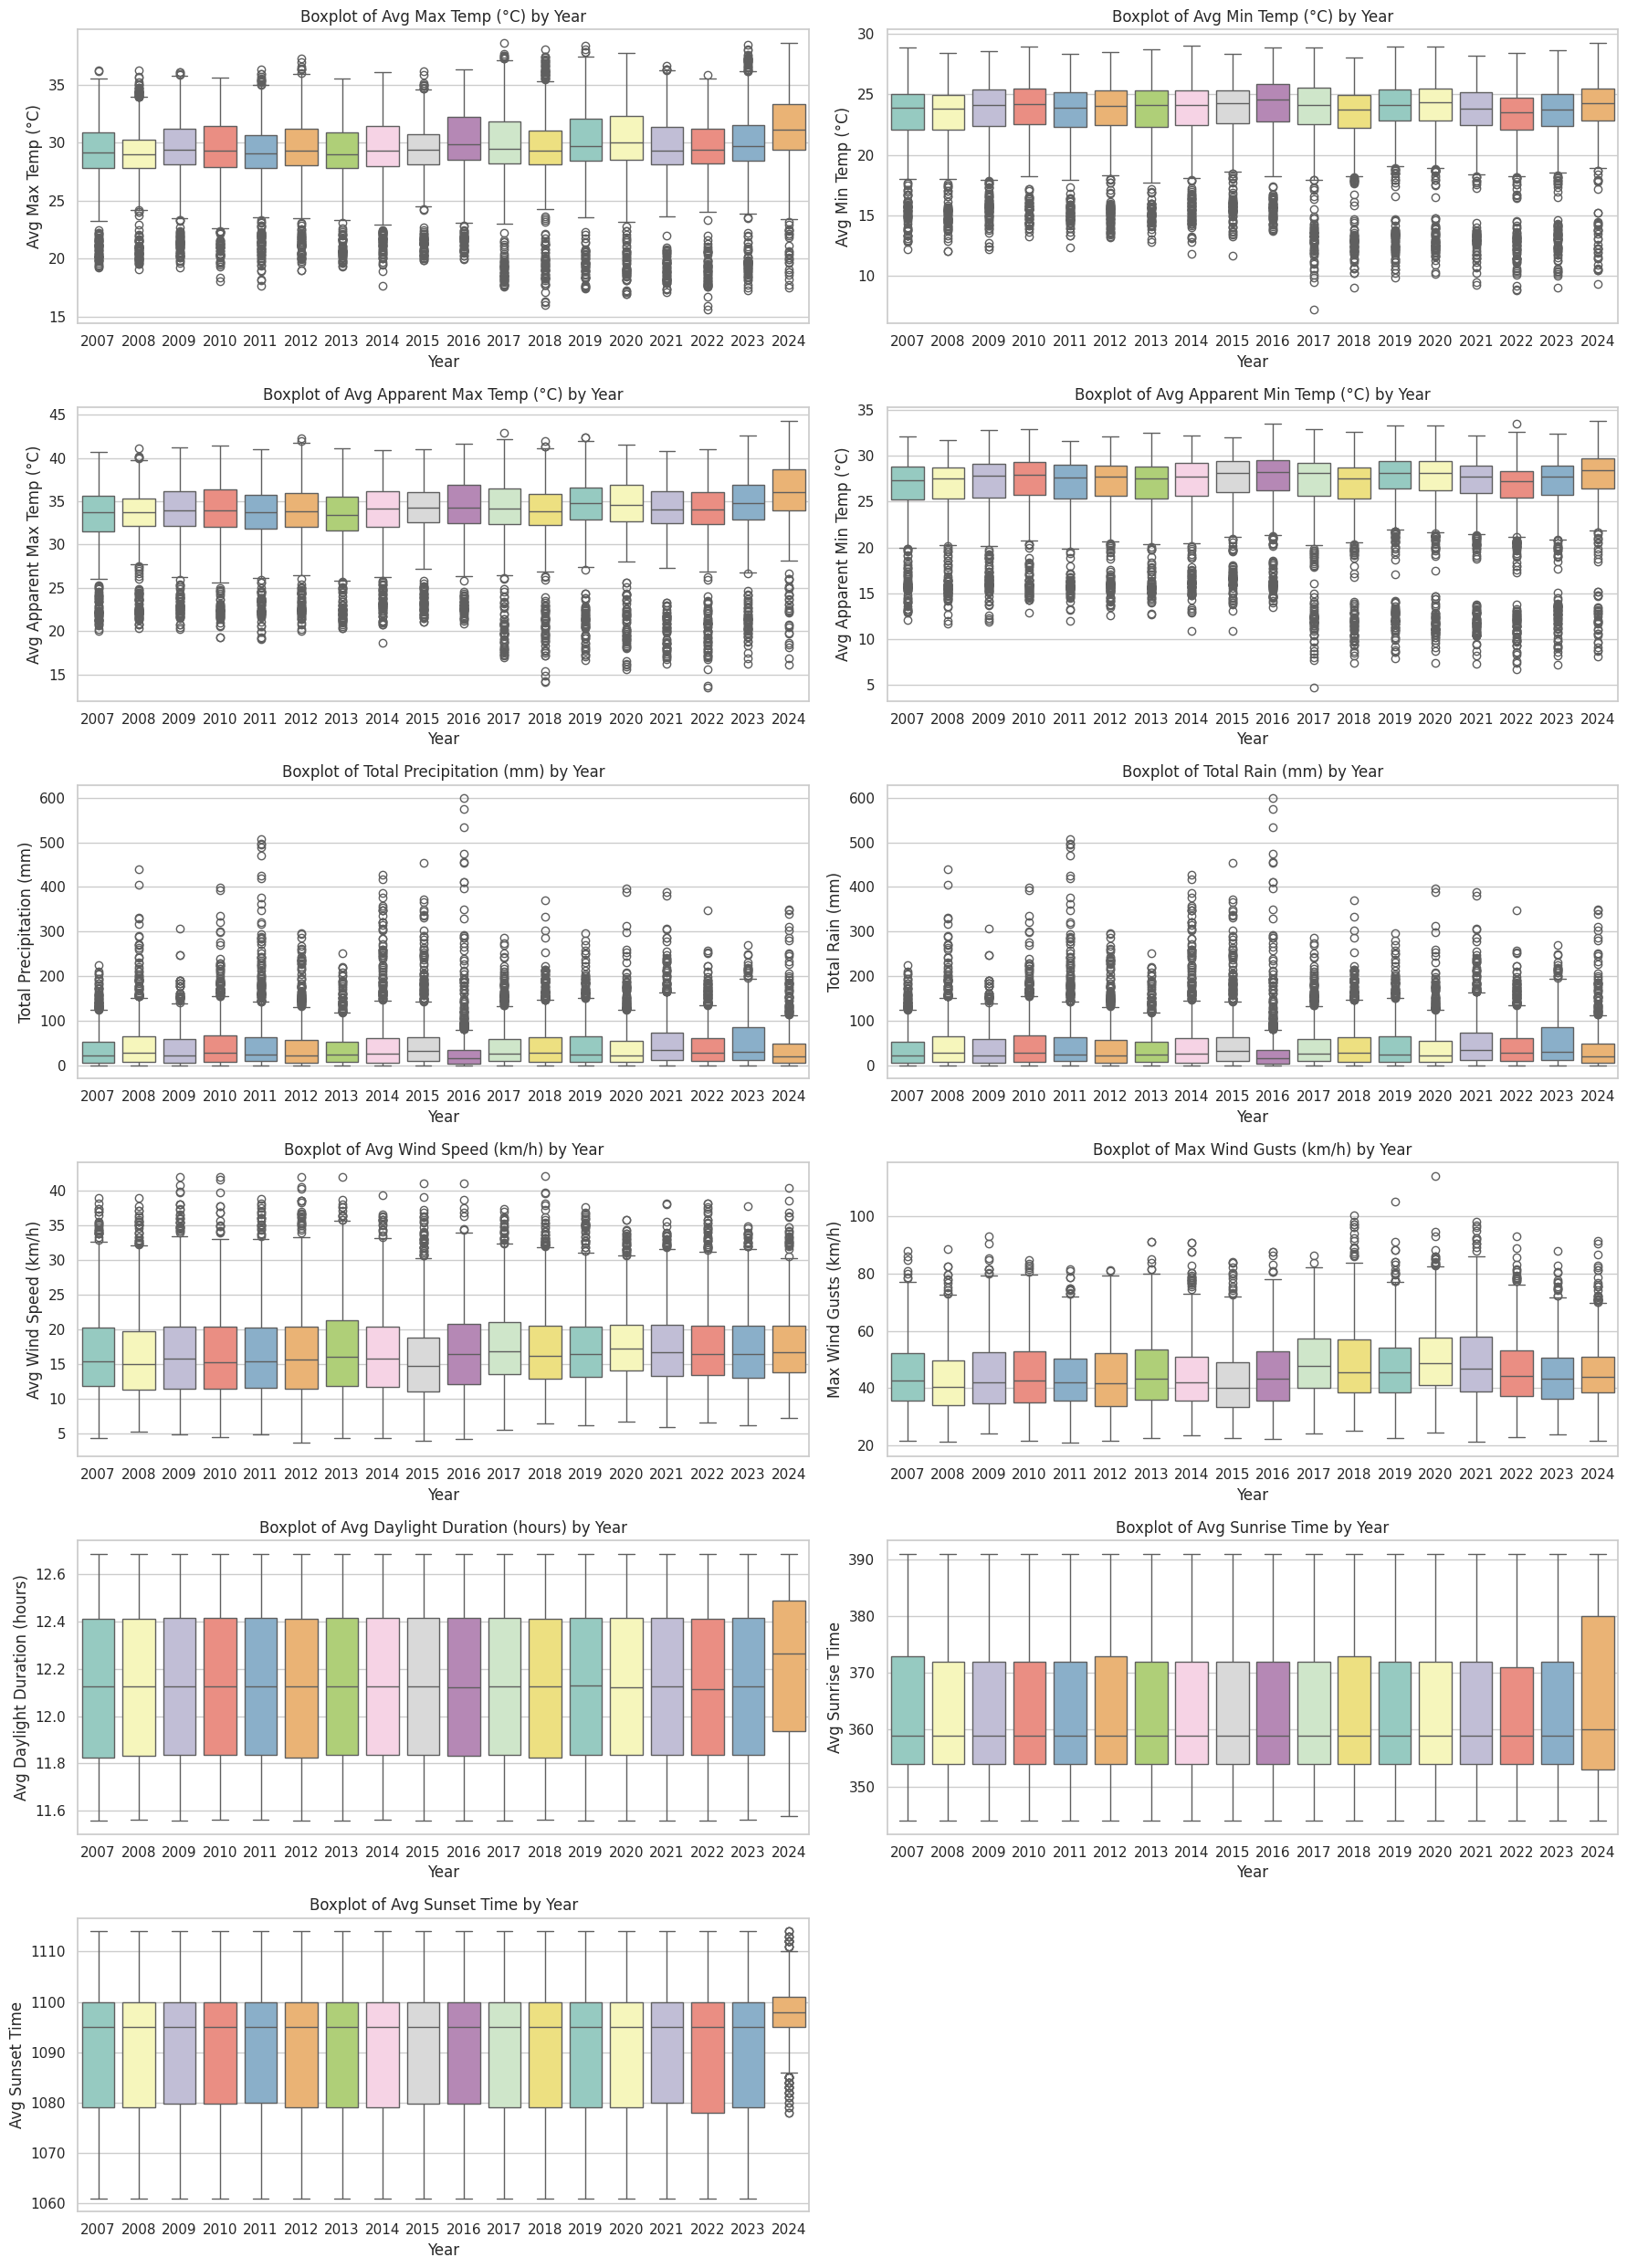

In [13]:
# Boxplot for each variable across years with two plots per row
plt.figure(figsize=(18, 25))
for i, var in enumerate(continuous_vars):
    plt.subplot(len(continuous_vars) // 2 + len(continuous_vars) % 2, 2, i + 1)
    sns.boxplot(data=df, x='Year', y=var, palette='Set3')
    plt.title(f'Boxplot of {var} by Year')
    plt.xlabel('Year')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

#### Temperature
- Generally consistent yearly patterns
- Some years (e.g., 2018, 2022) show higher variability
- Outliers present, especially in lower temperatures

#### Precipitation
- Highly variable across years
- Numerous outliers indicating frequent extreme rainfall events
- 2016 had an exceptionally high rainfall event

#### Wind
- Consistent median wind speeds
- Frequent outliers suggesting occasional strong wind events

#### Daylight and Time
- Highly consistent patterns across years, as expected
- Minimal year-to-year variation

#### Key Takeaways:--
1. Temperature patterns are stable with occasional high-variability years
2. Rainfall shows high variability with frequent extreme events
3. Wind data indicates consistent averages but notable extreme events
4. Daylight variables are highly consistent
5. Prevalence of outliers in precipitation and wind data is significant

## **Temporal Analysis**

**Time Series Analysis:** Plot the number of dengue cases over time to observe trends, seasonality, and any cyclic patterns. This can be done at different granularities (weekly, monthly, yearly).

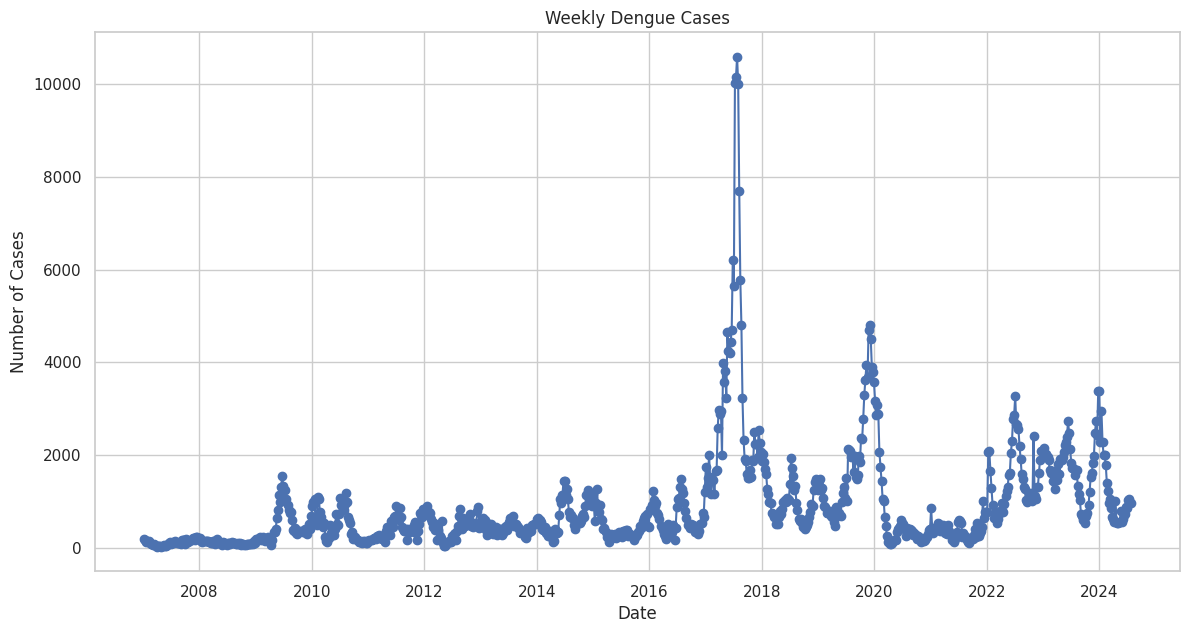

In [14]:
# Convert Week_Start_Date to datetime
df['Week_Start_Date'] = pd.to_datetime(df['Week_Start_Date'])

# Set the date column as the index
df.set_index('Week_Start_Date', inplace=True)

# Resample the data to weekly frequency and sum the number of cases
weekly_cases = df['Number_of_Cases'].resample('W').sum()

# Plot weekly cases
plt.figure(figsize=(14, 7))
plt.plot(weekly_cases.index, weekly_cases, marker='o', linestyle='-', color='b')
plt.title('Weekly Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show();

#### Key Insights from Weekly Dengue Cases (2008-2024)

1. **Significant Spike in 2017**:
   - The most notable feature in the data is the sharp spike in dengue cases during 2017, where weekly cases reached over 10,000(particularly for 3-4 weeks), significantly higher than any other period.
   - This spike could indicate a severe outbreak or an epidemic during this time.

2. **Periodic Fluctuations**:
   - There are regular peaks and troughs in dengue cases, suggesting **seasonality in dengue outbreaks**.
   - Local peaks(>2000 cases) seem to occur every 1-2 years, indicating recurring patterns in transmission.

3. **Post-2017 Behavior**:
   - After the large spike in 2017, there are several smaller, but still significant, **increases in cases**, especially around late 2019 and 2022.
   - Though none reach the magnitude of the 2017 spike, the post-2017 period shows higher variability in case counts compared to pre-2017.

4. **Low Case Counts Before 2017**:
   - From 2008 to 2016, dengue cases remained relatively low and stable, with minor fluctuations and no extreme spikes.
   - The change after 2016 suggests an evolving trend in dengue transmission, possibly due to changing environmental or socio-economic factors.

5. **Recent Trends (2022-2024)**:
   - While there is no sharp spike similar to 2017, cases remain relatively **higher than the pre-2016 period**, with frequent fluctuations.
   - This may indicate that the overall dengue incidence has increased in the last decade.

6. **Potential Periodicity**:
   - The pattern suggests a periodic outbreak cycle, with spikes occurring every few years, possibly linked to seasonal factors such as rainfall or temperature changes.




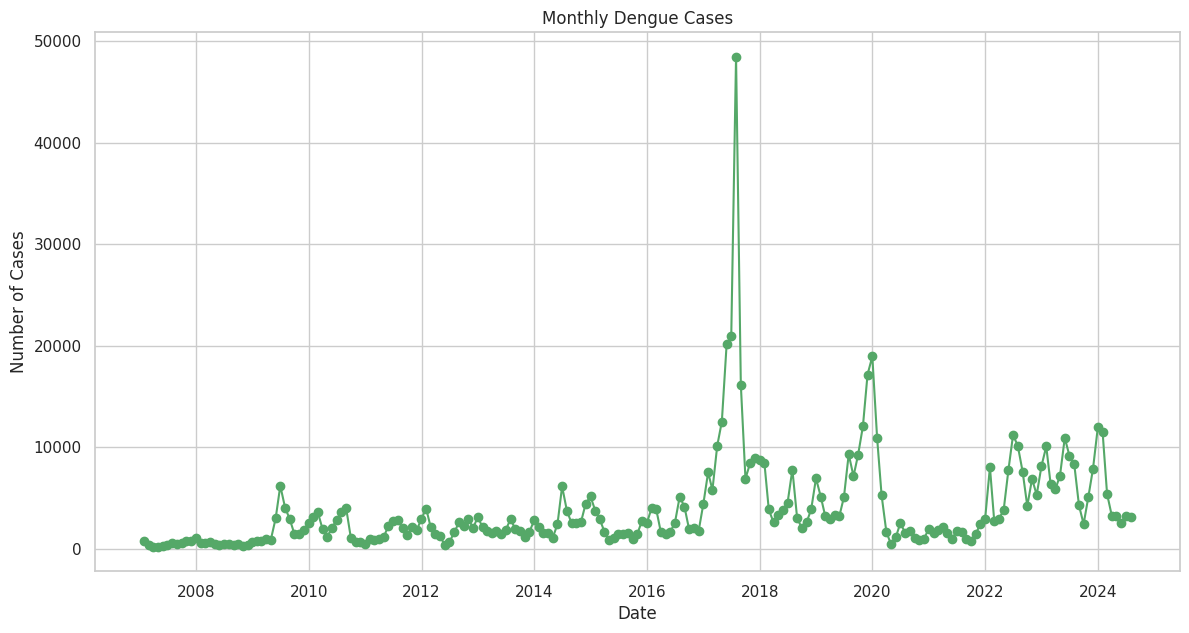

In [15]:
# Resample the data to monthly frequency and sum the number of cases
monthly_cases = df['Number_of_Cases'].resample('M').sum()

# Plot monthly cases
plt.figure(figsize=(14, 7))
plt.plot(monthly_cases.index, monthly_cases, marker='o', linestyle='-', color='g')
plt.title('Monthly Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show();

#### Key Insights from Monthly Dengue Cases (2008-2024)

1. **Major Peak in 2017**:
   - Similar to the weekly plot, a major spike is observed in 2017 with cases exceeding 45,000 in a particular month, marking a severe outbreak.

2. **Increased Cases After 2016**:
   - There is a noticeable rise in the baseline level of cases starting from 2016, with more frequent spikes occurring post-2016.

3. **Periodic Outbreaks**:
   - The data suggests periodic outbreaks approximately every 1-2 years, with smaller but still notable peaks in 2019, early 2020 and 2023.

4. **Stable Low Case Counts Before 2016**:
   - Before 2016, monthly cases remained consistently low, with only minor fluctuations and no extreme outbreaks.

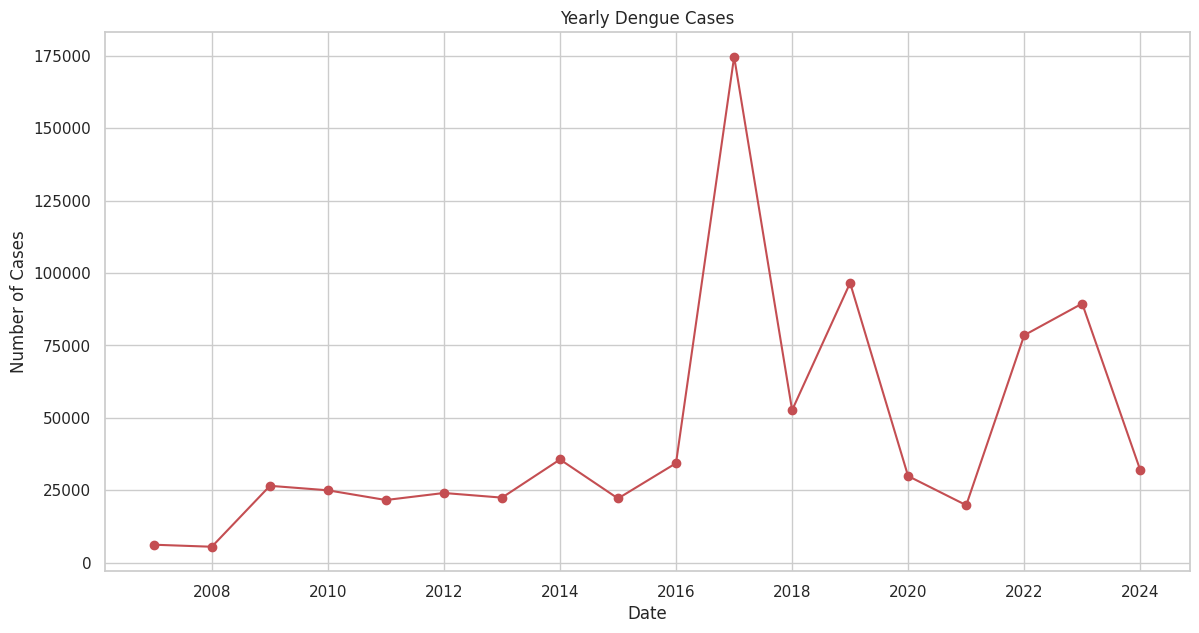

In [16]:
# Resample the data to yearly frequency and sum the number of cases
yearly_cases = df['Number_of_Cases'].resample('Y').sum()
yearly_cases.index = yearly_cases.index - pd.DateOffset(years=1)

# Plot yearly cases
plt.figure(figsize=(14, 7))
plt.plot(yearly_cases.index, yearly_cases, marker='o', linestyle='-', color='r')
plt.title('Yearly Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

#### Key Insights from Yearly Dengue Cases (2008-2024)

1. **Extreme Spike in 2017**:
   - A sharp increase in dengue cases occurred in 2017, reaching over 175,000 cases, marking the most significant outbreak in the entire dataset.

2. **Fluctuating Trends Post-2017**:
   - After the 2017 spike, the cases dropped significantly in 2018, but there have been multiple smaller peaks in 2019, 2022, and 2023, indicating continued periodic outbreaks.

3. **Low and Stable Cases Before 2016**:
   - From 2008 to 2015, the yearly cases remained stable, mostly fluctuating around 20,000 to 25,000 cases per year, with no extreme outliers.

4. **Increased Baseline After 2017**:
   - Post-2017, the yearly case counts remain higher compared to pre-2016 levels, suggesting a possible long-term change in dengue transmission dynamics.




#### **Seasonal Decomposition:** Apply seasonal decomposition using moving averages to break down the time series into trend, seasonal, and residual components.

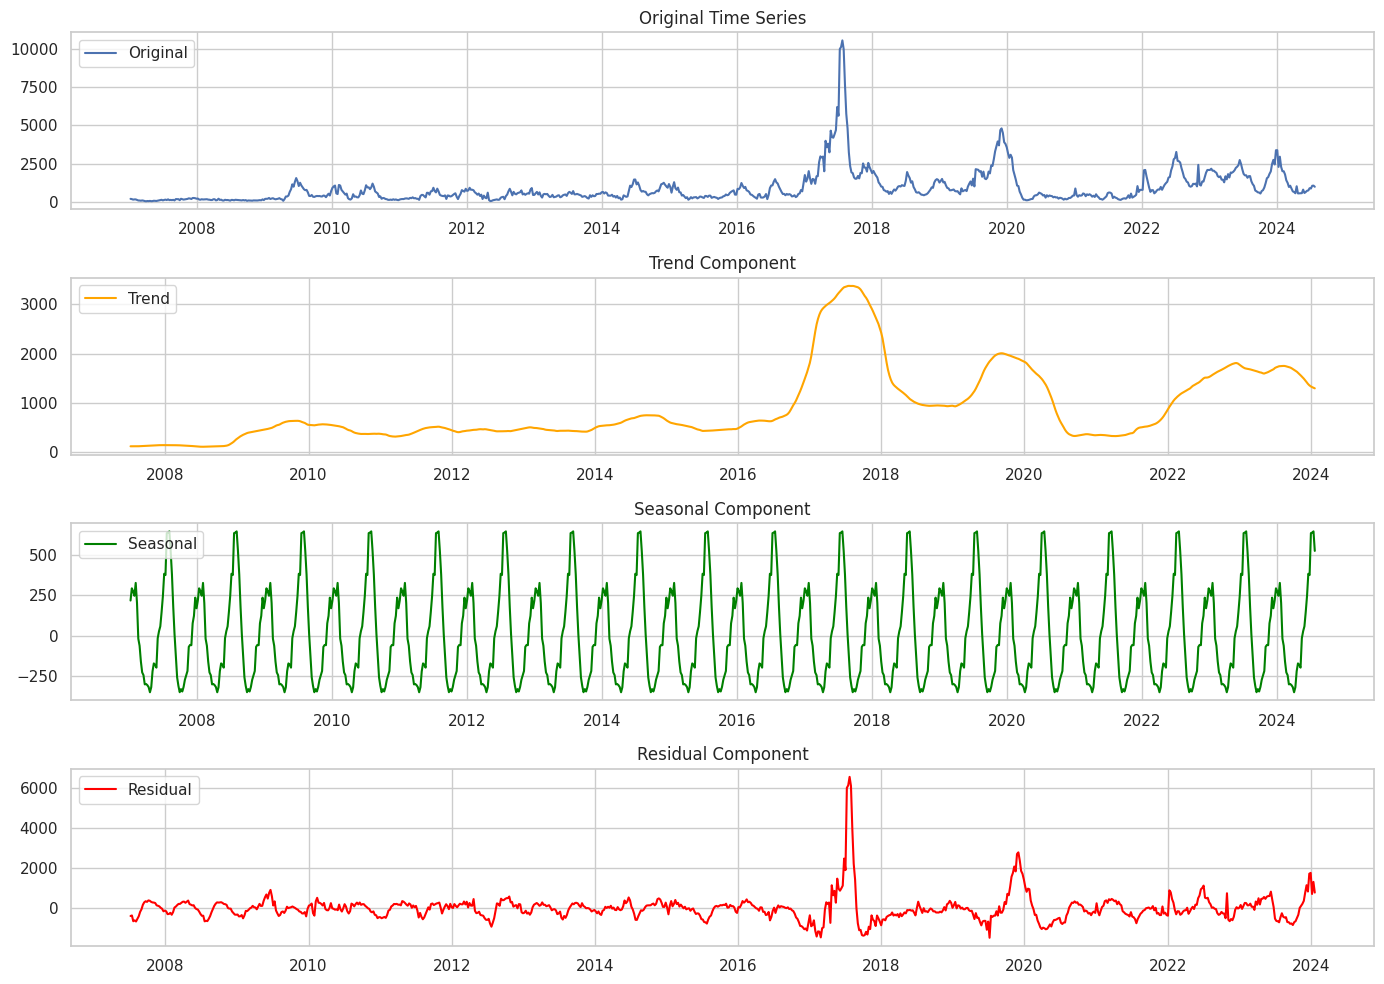

In [17]:
# Resample the data to weekly frequency and sum the number of cases
weekly_cases = df['Number_of_Cases'].resample('W').sum()

# Perform seasonal decomposition
decomposition = seasonal_decompose(weekly_cases, model='additive')  # or model='multiplicative'

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(weekly_cases, label='Original')
plt.title('Original Time Series')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show();

### Time Series Decomposition Insights for Dengue Outbreak Prediction

 1. **Original Series (Top Plot)**:
   - The dengue outbreak data shows clear spikes, with major outbreak periods in **2017** and a smaller peak around **2020**.
   - The highest spike is observed in **2017**, followed by a decline and another noticeable peak in **2020**.

 2. **Trend Component**:
   - A gradual upward trend from **2010** leads to a sharp rise in cases around **2017**.
   - After the **2017** peak, the trend declines but begins rising again around **2020**, indicating recurrent cycles of dengue outbreaks.

 3. **Seasonal Component**:
   - A strong **seasonal pattern** is observed, with predictable annual fluctuations.
   - These seasonal spikes suggest that dengue outbreaks are closely linked to specific months each year, likely driven by weather conditions favorable to mosquito activity.

 4. **Residual Component**:
   - The **residual plot** shows significant unexplained spikes, especially during **2017**, indicating possible anomalies or external factors influencing the outbreak severity.
   - The residual spikes highlight that some factors affecting dengue cases may not be entirely captured by the trend or seasonality components.

This decomposition highlights both the **cyclical, seasonal nature** of dengue outbreaks and the **anomalies** during peak outbreak years like 2017.


## **Spatial Analysis**

**Geographical Plots:** Visualize dengue cases across different districts using maps. This will help identify hotspots and regions with recurring outbreaks.

**Heatmaps:** Create heatmaps of dengue cases by district and time (e.g., months or weeks) to visualize spatial and temporal clustering.

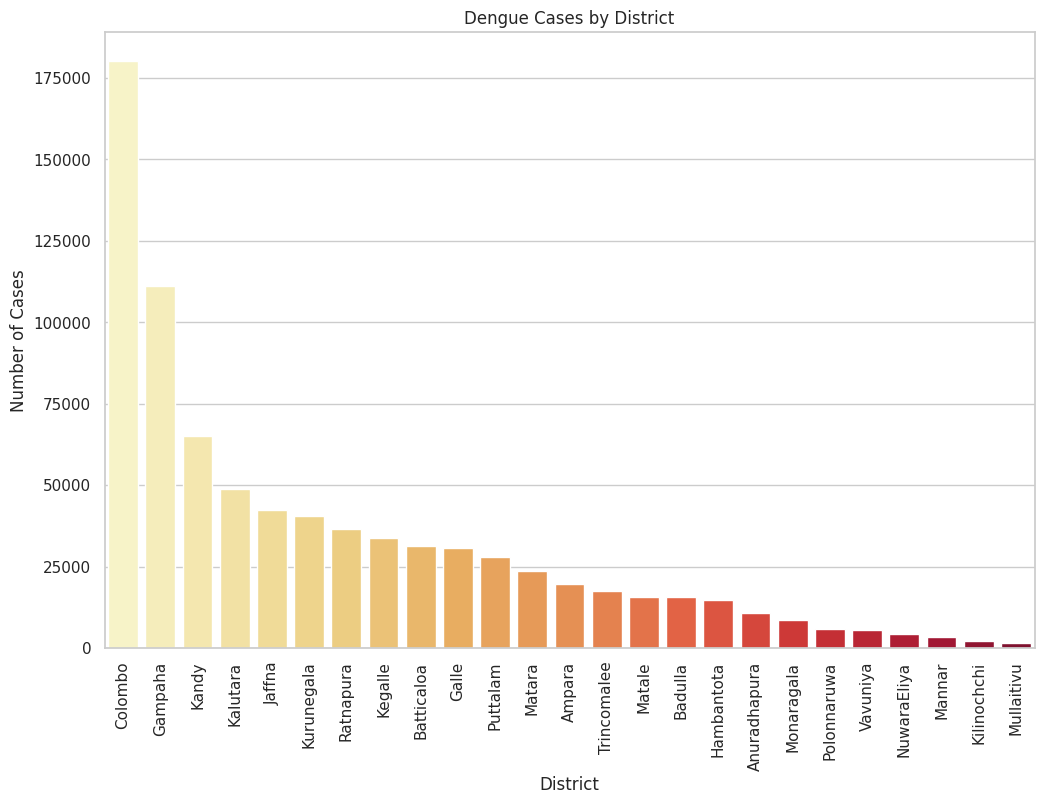

In [18]:
# Group by district and sum the number of cases
district_cases = df.groupby('District')['Number_of_Cases'].sum().reset_index()

# Sort districts by number of cases
district_cases = district_cases.sort_values(by='Number_of_Cases', ascending=False)

# Create a bar plot of cases by district
plt.figure(figsize=(12, 8))
sns.barplot(x='District', y='Number_of_Cases', data=district_cases, palette='YlOrRd')
plt.title('Dengue Cases by District')
plt.xlabel('District')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()

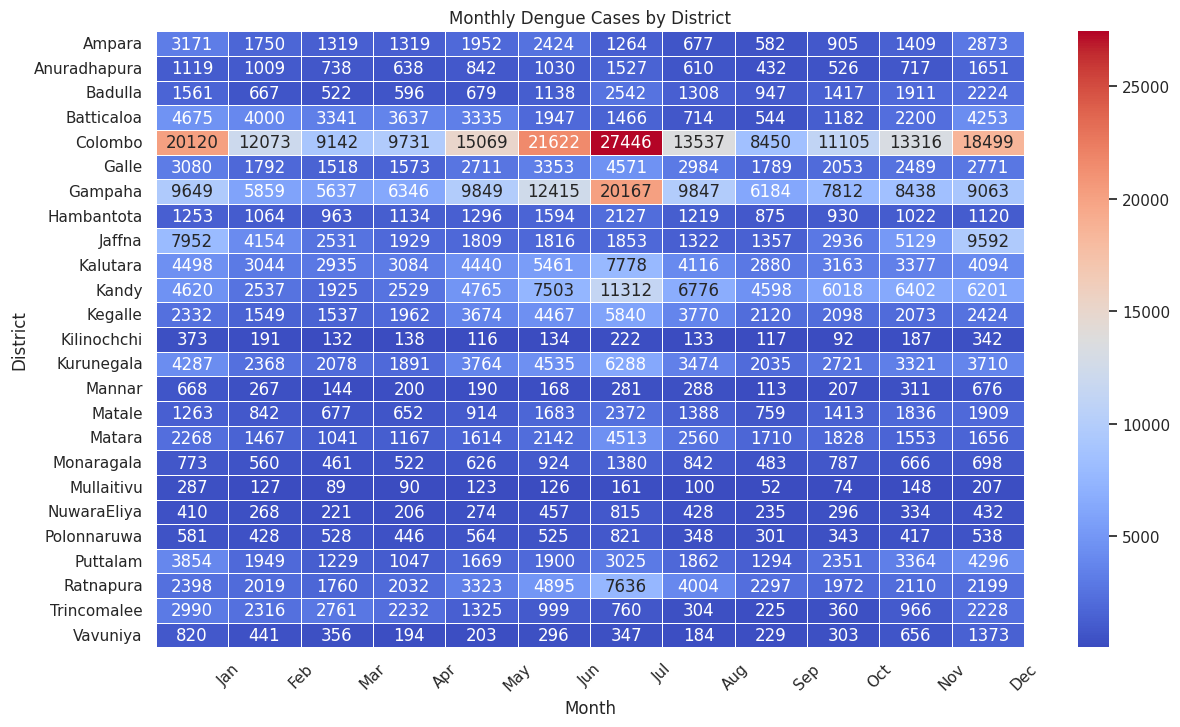

In [19]:
# Group by district and month to sum the number of cases
monthly_district_cases = df.groupby(['District', 'Month'])['Number_of_Cases'].sum().unstack()

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(monthly_district_cases, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5)
plt.title('Monthly Dengue Cases by District')
plt.xlabel('Month')
plt.ylabel('District')
plt.xticks(ticks=range(1, 13), labels=pd.date_range(start='2024-01-01', periods=12, freq='M').strftime('%b'), rotation=45)
plt.show()

#### Heatmap of Monthly Dengue Cases by District

#####  Colombo District:
- Has significantly higher dengue cases, especially in June, July, and January.
- **Cases peak in June** with 27,446 cases.
- This suggests that Colombo is **highly prone to dengue** outbreaks, particularly **in the mid-year** period.

#####  Gampaha and Ratnapura:
- Also show high dengue cases, especially in the months of June and July.
- These districts **experience peaks similar to Colombo** but at slightly lower values.

#####  Northern Districts (Jaffna, Kilinochchi):
- Show fewer cases compared to the central and southern parts of Sri Lanka.
- Jaffna experiences some spikes in December and January.

#####  Districts like Mannar, Mullaitivu, Kilinochchi:
- Generally report lower dengue cases year-round, with very low spikes.
- This indicates less susceptibility or lower population density.

####  General Pattern:
- **June, July, December and January tend to have the highest number of dengue cases in most districts.**
- These months correspond with the rainy season, implying a strong correlation between increased rainfall and dengue outbreaks.


## **Weather and Dengue Cases Relationship**

**Scatter Plots:** Plot dengue cases against different weather parameters (e.g., temperature, precipitation) to explore their relationships.

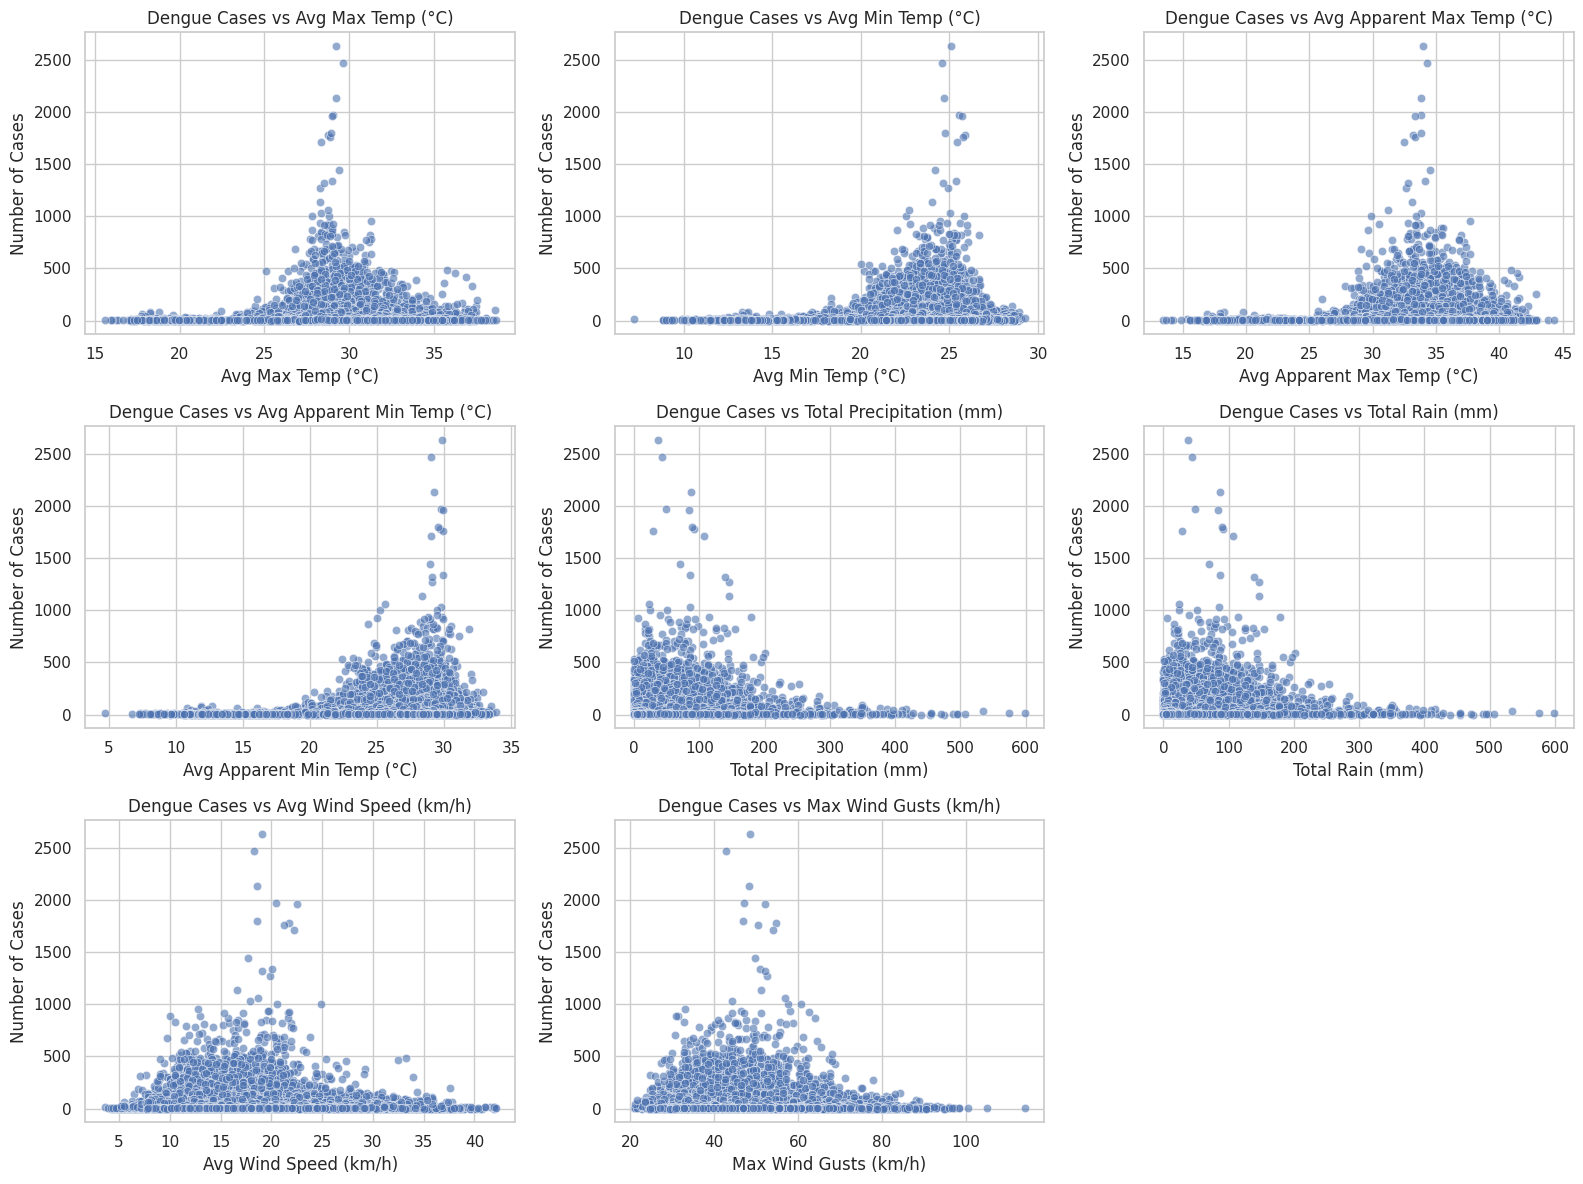

In [20]:
weather_params = [
    'Avg Max Temp (°C)',
    'Avg Min Temp (°C)',
    'Avg Apparent Max Temp (°C)',
    'Avg Apparent Min Temp (°C)',
    'Total Precipitation (mm)',
    'Total Rain (mm)',
    'Avg Wind Speed (km/h)',
    'Max Wind Gusts (km/h)'
]

# Create scatter plots for each weather parameter
plt.figure(figsize=(16, 12))

for i, param in enumerate(weather_params, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size if needed
    sns.scatterplot(data=df, x=param, y='Number_of_Cases', alpha=0.6)
    plt.title(f'Dengue Cases vs {param}')
    plt.xlabel(param)
    plt.ylabel('Number of Cases')

plt.tight_layout()
plt.show()

### Dengue Cases vs Environmental Variables

#### Temperature Factors:

- **Avg Max Temp (°C):** Most dengue cases are reported when the average maximum temperature is around 28°C to 32°C. This suggests that dengue transmission is optimized within this temperature range.
- **Avg Min Temp (°C) and Avg Apparent Max/Min Temp (°C):** Show similar trends, with dengue cases peaking when temperatures are around 25°C and 30°C(Around 35°C for Avg Apparent Max Temp). This indicates that *warmer temperatures may create favorable conditions for mosquito breeding* and virus transmission.

#### Precipitation and Rain:

- **Total Precipitation (mm) and Total Rain (mm):** There is a clear **increase in dengue cases when rainfall is between 50mm and 200mm.** This is likely due to stagnant water created by rainfall, which serves as a breeding ground for mosquitoes.
- *Beyond 300mm of rain, dengue cases appear to drop off, which may be due to excessive rainfall flushing out breeding sites or disrupting mosquito habitats.*

#### Wind Speed:

- **Avg Wind Speed (km/h) and Max Wind Gusts (km/h):** There are fewer dengue cases when avg wind speeds are higher (above 25 km/h). Windier conditions might make it harder for mosquitoes to fly and locate hosts, reducing transmission.
- Dengue cases tend to be more prevalent in areas where the average wind speed is between 15-23 km/h, indicating that calm conditions favor mosquito activity.

#### General Insights:

- **Temperature and Rainfall are the most influential factors in determining dengue outbreaks.** Warmer temperatures combined with moderate rainfall create ideal conditions for the Aedes mosquito, the primary vector of dengue.
- **Windier areas or periods with very high rainfall seem to experience fewer cases, possibly due to environmental disruption of mosquito breeding patterns.**
- Preventive measures during June-August in high-risk districts such as Colombo and Gampaha could be crucial to controlling outbreaks, especially in areas with moderate rainfall and favorable temperature conditions.


**Lag Analysis:** Analyze the effect of weather variables with a lag (e.g., how temperature or rainfall from the previous weeks influences current dengue cases).

In [21]:
# Assuming df is your DataFrame with a DatetimeIndex
df_lagged = df.copy()

# Create lagged variables for weather parameters (e.g., 1 week lag)
for param in [
    'Avg Max Temp (°C)',
    'Avg Min Temp (°C)',
    'Avg Apparent Max Temp (°C)',
    'Avg Apparent Min Temp (°C)',
    'Total Precipitation (mm)',
    'Total Rain (mm)',
    'Avg Wind Speed (km/h)',
    'Max Wind Gusts (km/h)'
]:
    df_lagged[f'{param}_lag1'] = df_lagged[param].shift(1)

In [22]:
# Calculate correlations with lagged variables
lagged_corr = df_lagged[['Number_of_Cases'] + [col for col in df_lagged.columns if '_lag1' in col]].corr()
lagged_corr

Number_of_Cases  Avg Max Temp (°C)_lag1  \
Number_of_Cases                         1.000000               -0.036631   
Avg Max Temp (°C)_lag1                 -0.036631                1.000000   
Avg Min Temp (°C)_lag1                  0.026552                0.727264   
Avg Apparent Max Temp (°C)_lag1         0.009843                0.921199   
Avg Apparent Min Temp (°C)_lag1         0.060686                0.722807   
Total Precipitation (mm)_lag1           0.096434               -0.368382   
Total Rain (mm)_lag1                    0.096434               -0.368382   
Avg Wind Speed (km/h)_lag1             -0.017625                0.223545   
Max Wind Gusts (km/h)_lag1             -0.012915                0.023586   

                                 Avg Min Temp (°C)_lag1  \
Number_of_Cases                                0.026552   
Avg Max Temp (°C)_lag1                         0.727264   
Avg Min Temp (°C)_lag1                         1.000000   
Avg Apparent Max Temp (°C)_lag1                0.716476   
Avg Apparent Min Temp (°C)_lag1                0.955266   
Total Precipitation (mm)_lag1                 -0.136520   
Total Rain (mm)_lag1                          -0.136520   
Avg Wind Speed (km/h)_lag1                     0.531927   
Max Wind Gusts (km/h)_lag1                     0.166165   

                                 Avg Apparent Max Temp (°C)_lag1  \
Number_of_Cases                                         0.009843   
Avg Max Temp (°C)_lag1                                  0.921199   
Avg Min Temp (°C)_lag1                                  0.716476   
Avg Apparent Max Temp (°C)_lag1                         1.000000   
Avg Apparent Min Temp (°C)_lag1                         0.802614   
Total Precipitation (mm)_lag1                          -0.207943   
Total Rain (mm)_lag1                                   -0.207943   
Avg Wind Speed (km/h)_lag1                             -0.018096   
Max Wind Gusts (km/h)_lag1                             -0.215043   

                                 Avg Apparent Min Temp (°C)_lag1  \
Number_of_Cases                                         0.060686   
Avg Max Temp (°C)_lag1                                  0.722807   
Avg Min Temp (°C)_lag1                                  0.955266   
Avg Apparent Max Temp (°C)_lag1                         0.802614   
Avg Apparent Min Temp (°C)_lag1                         1.000000   
Total Precipitation (mm)_lag1                          -0.049080   
Total Rain (mm)_lag1                                   -0.049080   
Avg Wind Speed (km/h)_lag1                              0.297431   
Max Wind Gusts (km/h)_lag1                             -0.019842   

                                 Total Precipitation (mm)_lag1  \
Number_of_Cases                                       0.096434   
Avg Max Temp (°C)_lag1                               -0.368382   
Avg Min Temp (°C)_lag1                               -0.136520   
Avg Apparent Max Temp (°C)_lag1                      -0.207943   
Avg Apparent Min Temp (°C)_lag1                      -0.049080   
Total Precipitation (mm)_lag1                         1.000000   
Total Rain (mm)_lag1                                  1.000000   
Avg Wind Speed (km/h)_lag1                           -0.229309   
Max Wind Gusts (km/h)_lag1                           -0.088866   

                                 Total Rain (mm)_lag1  \
Number_of_Cases                              0.096434   
Avg Max Temp (°C)_lag1                      -0.368382   
Avg Min Temp (°C)_lag1                      -0.136520   
Avg Apparent Max Temp (°C)_lag1             -0.207943   
Avg Apparent Min Temp (°C)_lag1             -0.049080   
Total Precipitation (mm)_lag1                1.000000   
Total Rain (mm)_lag1                         1.000000   
Avg Wind Speed (km/h)_lag1                  -0.229309   
Max Wind Gusts (km/h)_lag1                  -0.088866   

                                 Avg Wind Speed (km/h)_lag1  \
Number_of_Cases         

#### Insights:
- **Total Precipitation and Total Rainfall** show the highest positive correlation with dengue cases (`0.096434`), indicating that higher precipitation in the previous week might lead to more cases.
- **Average Min Temperature** also has a slight positive correlation (`0.026552`), while **Average Apparent Min Temperature** has a higher correlation (`0.060686`), suggesting that warmer minimum temperatures from the previous week could be linked to more dengue cases.
- **Average Max Temperature** and **Average Apparent Max Temperature** have negative or very weak correlations with dengue cases from the previous week, implying that these may not be strong predictors with a 1-week lag.
- **Wind Speed and Wind Gusts** show very low negative correlations, meaning wind variables may not have much influence on dengue cases.

We should focus on monitoring rainfall data to predict and prevent dengue outbreaks, as it has the most significant effect on future dengue cases.

In [23]:
df_lagged.shape

(22950, 26)

In [24]:
df_lagged = df_lagged.reset_index(drop=True)

In [25]:
print(df_lagged.index.is_unique)  # Should return True


True


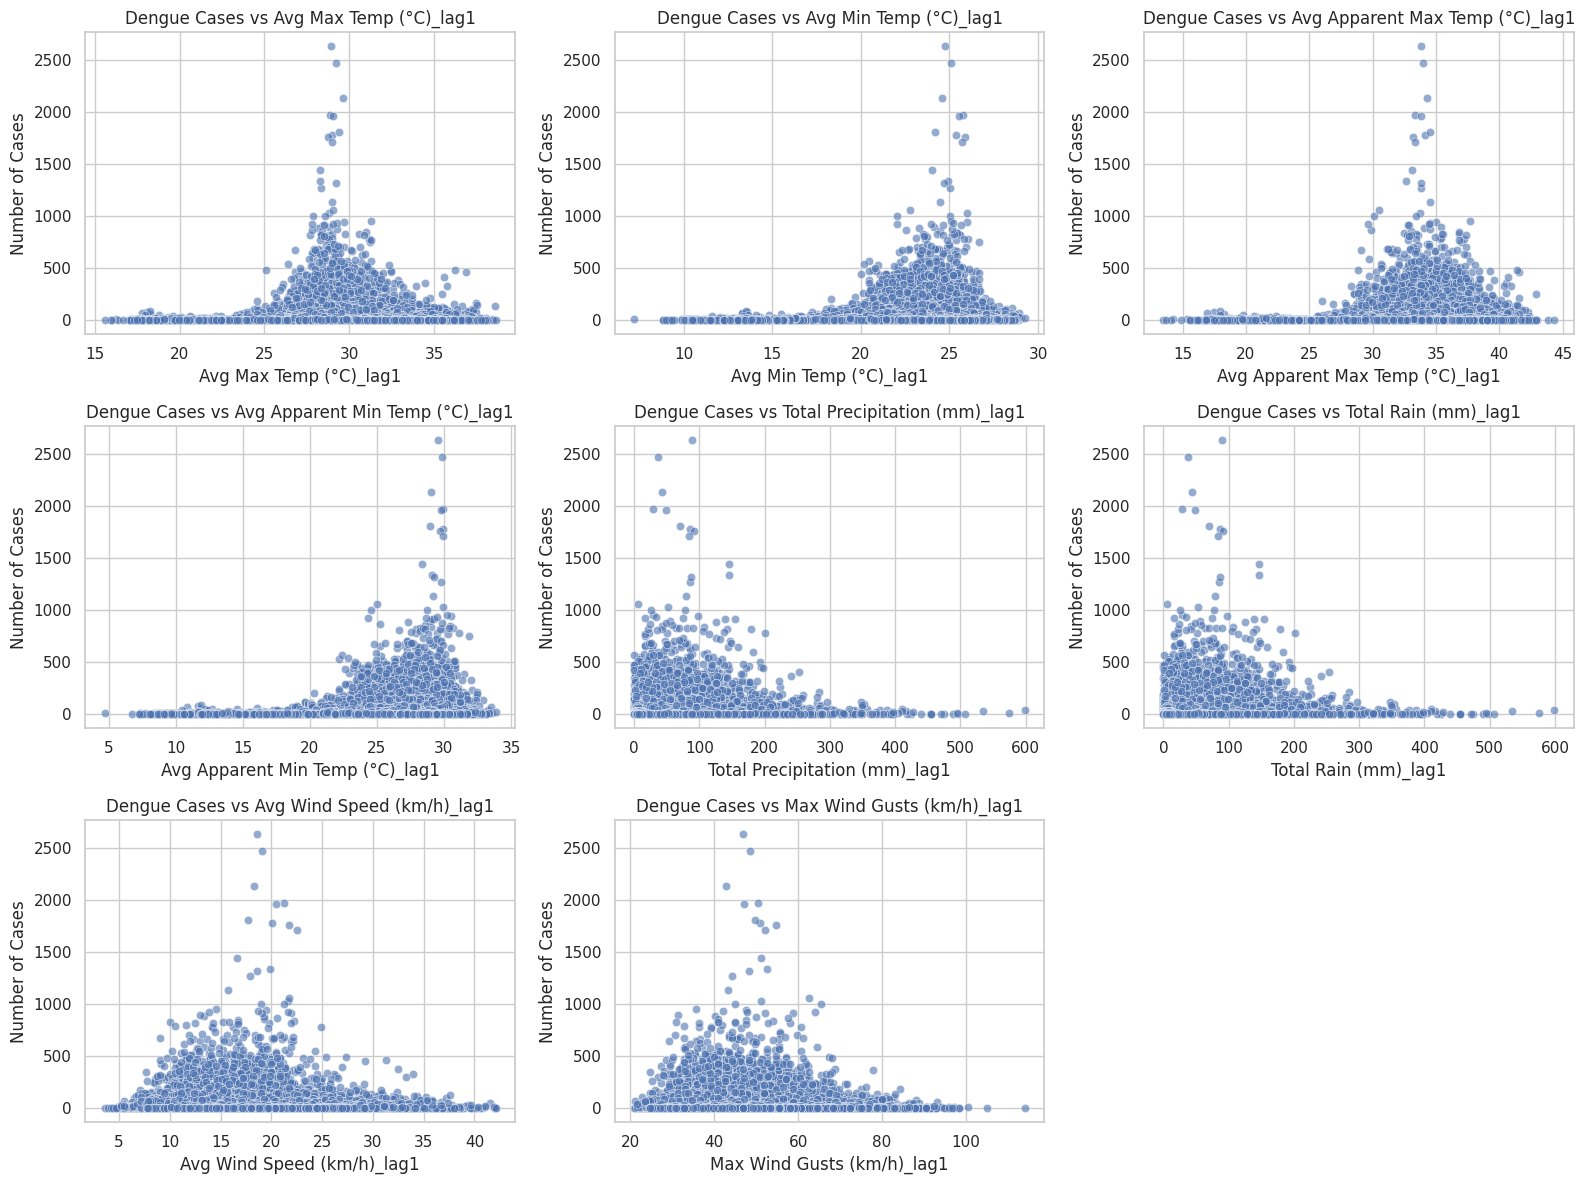

In [26]:
# List of lagged weather parameters to explore
lagged_weather_params = [
    'Avg Max Temp (°C)_lag1',
    'Avg Min Temp (°C)_lag1',
    'Avg Apparent Max Temp (°C)_lag1',
    'Avg Apparent Min Temp (°C)_lag1',
    'Total Precipitation (mm)_lag1',
    'Total Rain (mm)_lag1',
    'Avg Wind Speed (km/h)_lag1',
    'Max Wind Gusts (km/h)_lag1'
]

# Create scatter plots for each lagged weather parameter
plt.figure(figsize=(16, 12))

for i, param in enumerate(lagged_weather_params, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size if needed
    sns.scatterplot(data=df_lagged, x=param, y='Number_of_Cases', alpha=0.6)
    plt.title(f'Dengue Cases vs {param}')
    plt.xlabel(param)
    plt.ylabel('Number of Cases')

plt.tight_layout()
plt.show()

### Comparative Analysis

**Pre-Outbreak vs. Post-Outbreak:** Compare weather and other features before and after known outbreak periods to identify potential predictors.

In [27]:
# Define an outbreak threshold
outbreak_threshold = df['Number_of_Cases'].quantile(0.95)  # Example threshold

# Mark outbreak periods
df['Outbreak'] = df['Number_of_Cases'] > outbreak_threshold

In [28]:
# Convert the index to datetime if not already
df.index = pd.to_datetime(df.index)

# Create a function to get pre- and post-outbreak periods
def get_window_data(df, outbreak_dates, pre_weeks=4, post_weeks=4):
    pre_post_data = []
    for outbreak_date in outbreak_dates:
        pre_start = outbreak_date - pd.DateOffset(weeks=pre_weeks)
        post_end = outbreak_date + pd.DateOffset(weeks=post_weeks)

        pre_data = df[(df.index >= pre_start) & (df.index < outbreak_date)]
        post_data = df[(df.index > outbreak_date) & (df.index <= post_end)]

        pre_post_data.append((pre_data, post_data))

    return pre_post_data

# Extract outbreak dates
outbreak_dates = df[df['Outbreak']].index

# Get pre- and post-outbreak data
pre_post_data = get_window_data(df, outbreak_dates)

In [29]:
def summarize_data(pre_post_data):
    summary_stats = []
    for pre_data, post_data in pre_post_data:
        stats = {
            'Pre-Outbreak': {
                'Mean Temp': pre_data['Avg Max Temp (°C)'].mean(),
                'Mean Precipitation': pre_data['Total Precipitation (mm)'].mean(),
                'Mean Cases': pre_data['Number_of_Cases'].mean()
            },
            'Post-Outbreak': {
                'Mean Temp': post_data['Avg Max Temp (°C)'].mean(),
                'Mean Precipitation': post_data['Total Precipitation (mm)'].mean(),
                'Mean Cases': post_data['Number_of_Cases'].mean()
            }
        }
        summary_stats.append(stats)
    return summary_stats

# Get summary statistics
summary_stats = summarize_data(pre_post_data)

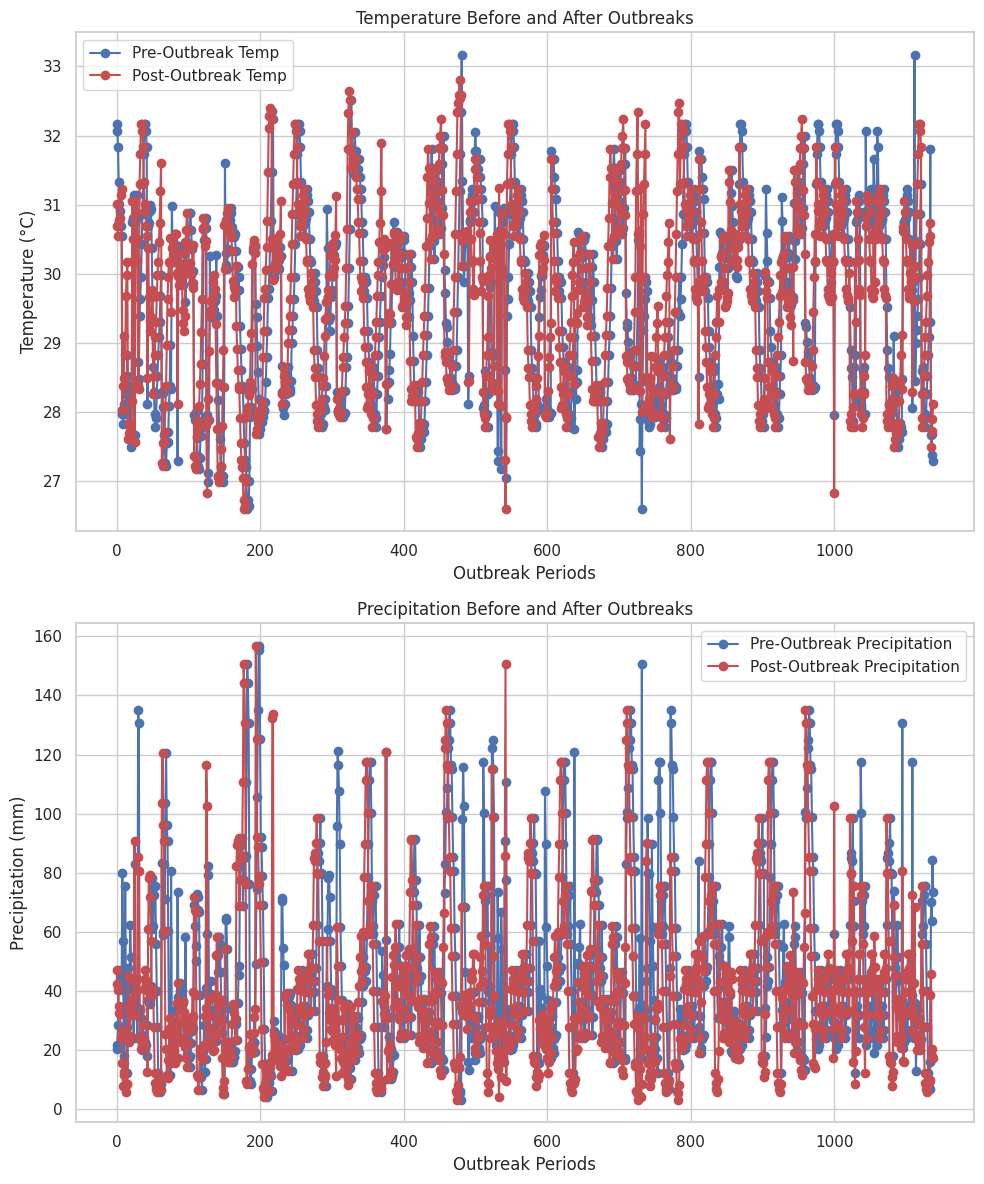

In [30]:
def plot_summary_statistics(summary_stats):
    pre_temp = [stats['Pre-Outbreak']['Mean Temp'] for stats in summary_stats]
    post_temp = [stats['Post-Outbreak']['Mean Temp'] for stats in summary_stats]
    pre_precip = [stats['Pre-Outbreak']['Mean Precipitation'] for stats in summary_stats]
    post_precip = [stats['Post-Outbreak']['Mean Precipitation'] for stats in summary_stats]

    x = range(len(summary_stats))

    plt.figure(figsize=(10, 12))  # Adjusted figure size for better visibility

    # Temperature Plot
    plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
    plt.plot(x, pre_temp, 'bo-', label='Pre-Outbreak Temp')
    plt.plot(x, post_temp, 'ro-', label='Post-Outbreak Temp')
    plt.xlabel('Outbreak Periods')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Before and After Outbreaks')
    plt.legend()

    # Precipitation Plot
    plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
    plt.plot(x, pre_precip, 'bo-', label='Pre-Outbreak Precipitation')
    plt.plot(x, post_precip, 'ro-', label='Post-Outbreak Precipitation')
    plt.xlabel('Outbreak Periods')
    plt.ylabel('Precipitation (mm)')
    plt.title('Precipitation Before and After Outbreaks')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the summary statistics
plot_summary_statistics(summary_stats)

#### Insights from Pre-Outbreak vs. Post-Outbreak Plots

 1. **Temperature Trends**:
   - There is no obvious difference between **pre-outbreak** and **post-outbreak** temperatures in the plot. Both exhibit overlapping ranges and fluctuations between 27°C and 33°C.
   - The temperature before and after outbreaks remains fairly consistent, indicating that **temperature alone may not be a strong predictor** of dengue outbreaks, as there is no clear pre-outbreak temperature drop or rise.

 2. **Precipitation Trends**:
   - In the precipitation plot, both pre-outbreak and post-outbreak precipitation values also show similar patterns and ranges.
   - However, **post-outbreak precipitation** seems to have more frequent higher spikes than pre-outbreak precipitation, indicating **heavier rainfall might follow outbreaks**, but it is not always a precursor.
   - This suggests **rainfall might have a lagged effect** on outbreaks, potentially contributing to mosquito breeding conditions that lead to outbreaks later on.

 3. **Potential Predictors**:
   - Neither temperature nor precipitation exhibits clear, immediate differences that would make them obvious predictors when comparing pre- and post-outbreak conditions.
   - The absence of significant distinctions between pre- and post-outbreak periods implies that **a combination of factors** or more complex relationships, possibly with **lagged environmental variables**, may be needed to predict dengue outbreaks.

 4. **Volatility of Environmental Conditions**:
   - Both temperature and precipitation show high variability before and after outbreaks, which highlights that dengue outbreaks are influenced by a **dynamic set of environmental conditions**, making simple patterns harder to detect.
   - This reinforces the idea that predictive models need to account for the **timing and interaction** of weather features rather than relying on single variables.

**Summary:**

Temperature and precipitation show no significant differences between pre-outbreak and post-outbreak periods. Rainfall seems to peak more frequently after outbreaks, but no direct one-to-one relationship is evident. **Predicting dengue outbreaks likely requires more complex models that consider lag effects and interactions between environmental variables.**

### Clustering and Anomaly Detection

**Clustering:** Apply clustering algorithms like K-means or DBSCAN on the dataset to find natural groupings of similar regions or time periods with similar dengue incidence.


In [31]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['Number_of_Cases', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)',
               'Total Precipitation (mm)', 'Avg Wind Speed (km/h)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#### K-means Clustering

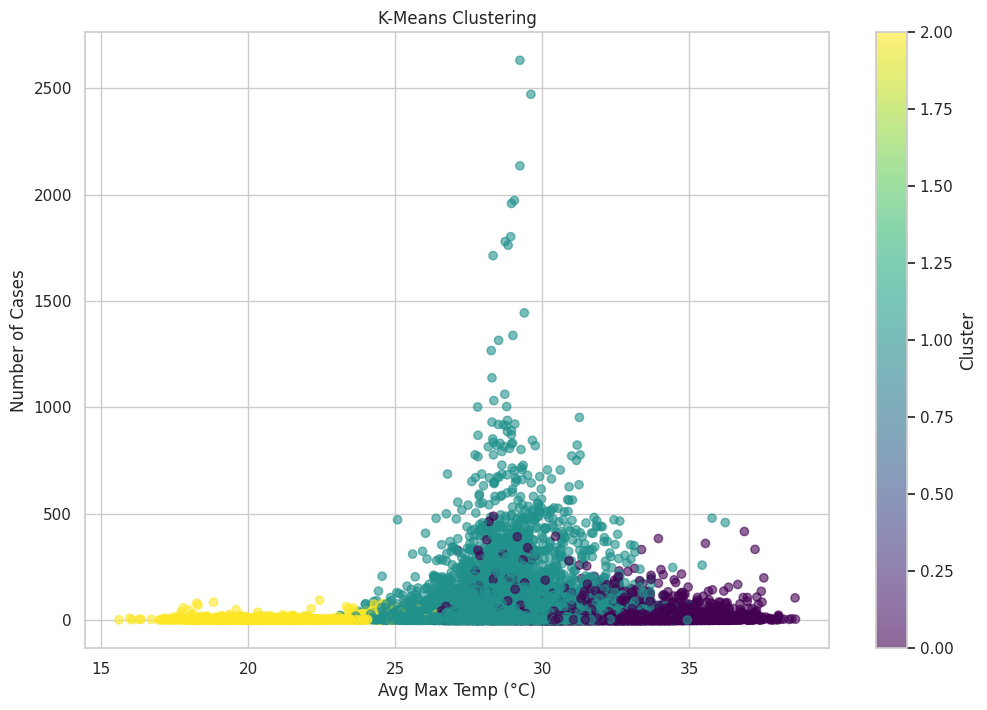

In [32]:
from sklearn.cluster import KMeans

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=0)  # Choose the number of clusters
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Plotting clusters
plt.figure(figsize=(12, 8))
plt.scatter(df['Avg Max Temp (°C)'], df['Number_of_Cases'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Avg Max Temp (°C)')
plt.ylabel('Number of Cases')
plt.colorbar(label='Cluster')
plt.show()

#### Insights from K-Means Clustering Plot

1. **Cluster Distribution**:
   - The K-Means clustering algorithm has identified three distinct clusters (visualized using different colors) based on the **Average Maximum Temperature** and **Number of Dengue Cases**.
   - There is a **clear separation** of clusters, especially for temperatures below 25°C, where cases are generally much lower, forming a separate cluster (yellow) with fewer cases and lower temperatures.

2. **Higher Temperatures and Cases**:
   - The **central cluster** (green/teal) shows a range of temperatures between approximately 25°C and 32°C, where most of the cases lie.
   - This suggests that **moderate to high temperatures** (25°C to 32°C) are more associated with **higher numbers of dengue cases**. This may indicate that these temperatures provide favorable conditions for mosquito activity and disease transmission.

3. **Extreme Temperatures (Above 32°C)**:
   - For **temperatures above 32°C**, the **purple cluster** shows relatively fewer cases.
   - This might suggest that **extreme heat** could inhibit mosquito survival or human exposure, thus potentially reducing the transmission rate.

4. **Low Temperature and Dengue Cases**:
   - The **yellow cluster** corresponds to **low temperatures** (below 25°C) and **low numbers of dengue cases**. This indicates that lower temperatures are generally **less conducive to dengue transmission**, possibly due to reduced mosquito activity at these cooler temperatures.

5. **Number of Cases Pattern**:
   - The number of cases **peaks** within the 25°C-32°C range, tapering off at higher temperatures.
   - This trend supports the idea that a **specific temperature window** (25°C-32°C) is particularly conducive to outbreaks, likely due to favorable breeding and survival conditions for mosquitoes.

##### **Key Takeaway:**
The clustering suggests a clear relationship between **temperature** and **dengue case numbers**, with cases peaking in the 25°C-32°C range. Lower temperatures seem to result in significantly fewer cases, while extremely high temperatures (above 32°C) might have a dampening effect on outbreaks. This reinforces the importance of **temperature** as a key environmental variable in predicting dengue outbreaks.

#### DBSCAN Clustering

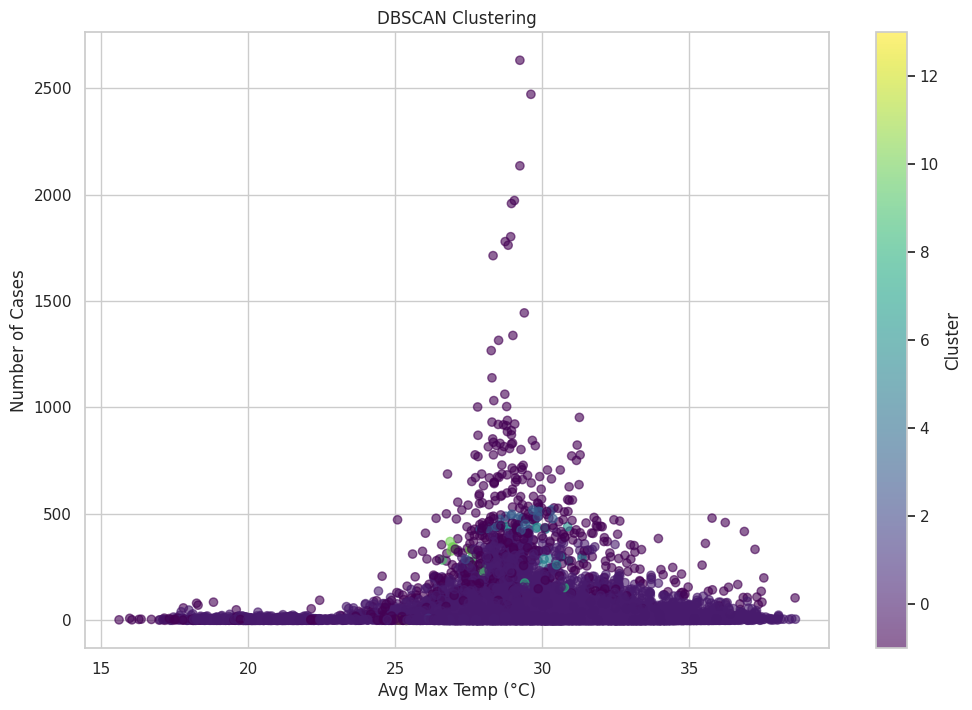

In [33]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Plotting clusters
plt.figure(figsize=(12, 8))
plt.scatter(df['Avg Max Temp (°C)'], df['Number_of_Cases'], c=df['DBSCAN_Cluster'], cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Avg Max Temp (°C)')
plt.ylabel('Number of Cases')
plt.colorbar(label='Cluster')
plt.show()

**Anomaly Detection:** Identify periods or regions where dengue cases significantly deviate from the norm, which might indicate unusual outbreaks.

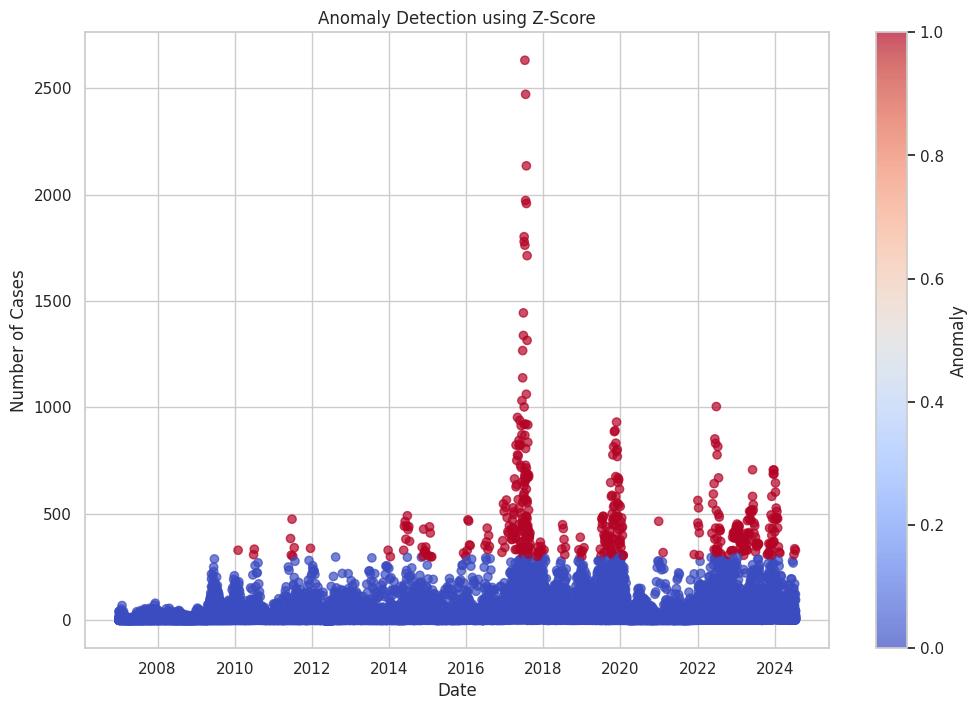

In [34]:
# Calculate Z-scores
df['Z_Score'] = (df['Number_of_Cases'] - df['Number_of_Cases'].mean()) / df['Number_of_Cases'].std()

# Define a threshold for anomaly detection
threshold = 3  # You can adjust this threshold based on your needs
df['Anomaly'] = df['Z_Score'].abs() > threshold

# Plot anomalies
plt.figure(figsize=(12, 8))
plt.scatter(df.index, df['Number_of_Cases'], c=df['Anomaly'], cmap='coolwarm', alpha=0.7)
plt.title('Anomaly Detection using Z-Score')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.colorbar(label='Anomaly')
plt.show()

#### Insights from Anomaly Detection Plot using Z-Score

1. **Anomalies Detected (Red Points)**:
   - Major anomalies appear around **2017, 2020** and **2022 onwards**, indicating significant deviations in dengue cases during these periods.

2. **Normal Periods (Blue Points)**:
   - Stable or lower dengue activity before **2016** and post-**2020**, marked by blue points.

3. **Major Outbreaks**:
   - The largest outbreak is around **2017**, with cases exceeding **2500**.
   - Another surge is visible around **2020**, though smaller than 2017.

4. **Post-2018 Stability**:
   - While there is some stability post-2018, smaller anomalies still persist, indicating periodic outbreaks.

5. **Temporal Clustering**:
   - Anomalies are clustered between **2016-2018**, suggesting potential external factors driving higher dengue incidence.

##### Key Takeaway:
The plot highlights major outbreaks in **2017, 2020** and **2022**, making these key periods for further investigation.

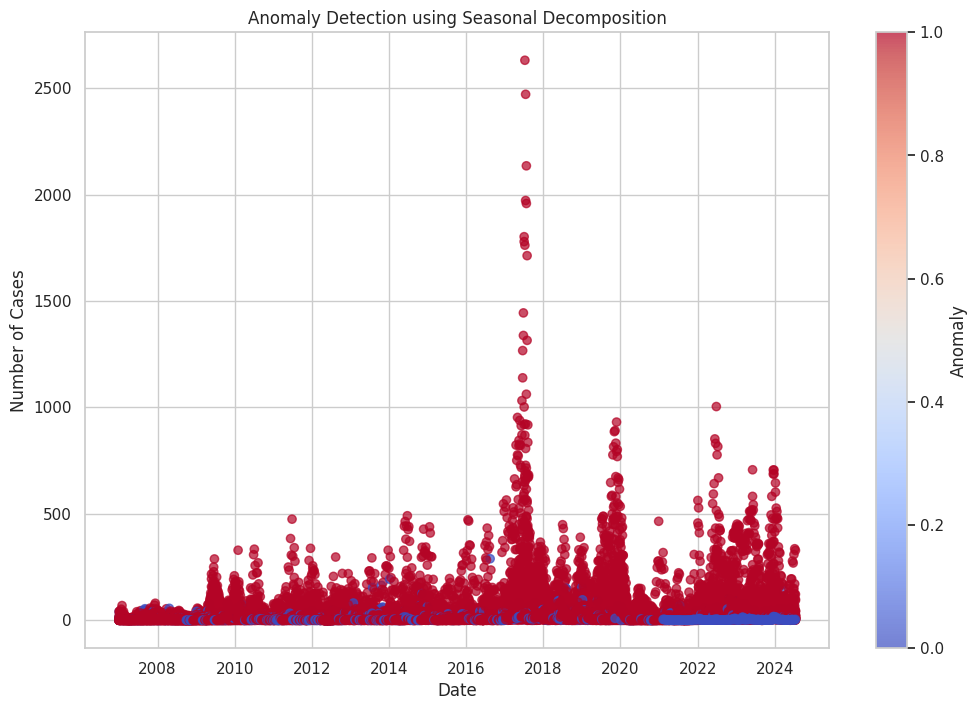

In [35]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Number_of_Cases'], model='additive', period=365)  # Adjust period based on your data

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Define a threshold for anomaly detection
threshold = 2  # You can adjust this threshold based on your needs
df['Anomaly'] = residual.abs() > threshold

# Plot anomalies
plt.figure(figsize=(12, 8))
plt.scatter(df.index, df['Number_of_Cases'], c=df['Anomaly'], cmap='coolwarm', alpha=0.7)
plt.title('Anomaly Detection using Seasonal Decomposition')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.colorbar(label='Anomaly')
plt.show()

1. **Peak Outlier Around 2017**:
   - A massive spike in dengue cases was detected as an anomaly in 2017. This period corresponds to an unusually large dengue outbreak in Sri Lanka.
   - The number of cases reached a sharp peak, significantly deviating from the regular seasonal trends, suggesting external factors such as unusual weather conditions or public health issues.

2. **Post-2018 Decline in Anomalies**:
   - After 2018, the number of anomalies sharply decreased, indicating that the outbreak was brought under control, and the situation returned to regular seasonal patterns.

3. **Seasonality and Recurring Cases**:
   - Most years follow a regular pattern with moderate spikes in dengue cases, but the 2017-2018 period clearly deviated from this trend.
   - Seasonal trends are visible, with smaller annual spikes, but these are not classified as anomalies.

4. **Smaller Anomalies in Recent Years**:
   - Post-2020, there are fewer anomalies overall, although minor spikes are visible, particularly around 2023. This suggests the dengue outbreaks may have been smaller or better controlled.
